Get data

In [110]:
# define rmsle model evaluation function

def rmsle(y_true: pd.Series, y_pred:pd.Series):
    return (((np.log1p(y_true)-np.log1p(y_pred))**2).mean())**0.5

In [111]:
file_path = "./data/X.csv"
X = pd.read_csv(file_path)

file_path = "./data/y.csv"
y = pd.read_csv(file_path)

# Joining y into X
d = X.set_index('id').join(y.set_index('id'))

# removing redundant/extra columns

d.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

# Adding a BMI column: BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared
d['BMI'] = d['weight']/(d['height']**2)

# clear all null lines
for column in d.columns:
    nulls_mask = d[column].notnull()  # or column_with_nulls.isna()
    d = d[nulls_mask]
    
# changing 'Age' to int
d['Age'] = d['Age'].astype(int)

# removing 'O' Gender values:
d = d[d['Gender'] != 'O']

# rounding 'height' values to 2 decimal points
d['height'] = round(d['height']/0.01)*0.01

# rounding weight feature values to no decimal points
d['weight'] = round(d['weight'],0).astype(int)

# changing Salary type from float to int
d['Salary'] = d['Salary'].astype(int)

# rounding BMI value to 1 decimal point
d['BMI'] = round(d['BMI'],1)

# deal with categorial columns
label_encoder = LabelEncoder()
for column in d.select_dtypes(include=['object']).columns:
    d[column + '_encoded'] = label_encoder.fit_transform(d[column])

In [112]:
# # iterating through all unique values to identify annomalies
# for column in d.columns:
#     print([column, d[column].sort_values().unique()])

In [113]:
# Examining how log(Salary) vs. BMI and Gender looks on a scatter plot
d['log_Salary'] = np.log(d.Salary)

# all_feature names with no redundancy
all_features = ['Age', 'Years of Experience','professionalism', 'Salary','log_Salary','BMI', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded','Country_encoded', 'Race_encoded']

# storing a df that will be used as input for DecisionTreeRegressor to create the 'feature_importance' output
d2 = d[all_features]

X = d2.drop(columns = ['Salary','log_Salary'])
y = d2.Salary

# split the datasets to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [114]:
# sns.scatterplot(data = d,x= 'BMI', y = 'log_Salary', hue = 'Gender', alpha = 0.7).set(ylim = (9,13))

When minimal samples split equals 2:
Decision Tree reg. training model's rmsle is 0.0000
Decision Tree reg. test model's rmsle is 0.1753
the difference between train's and test's rmsle's is 0.18



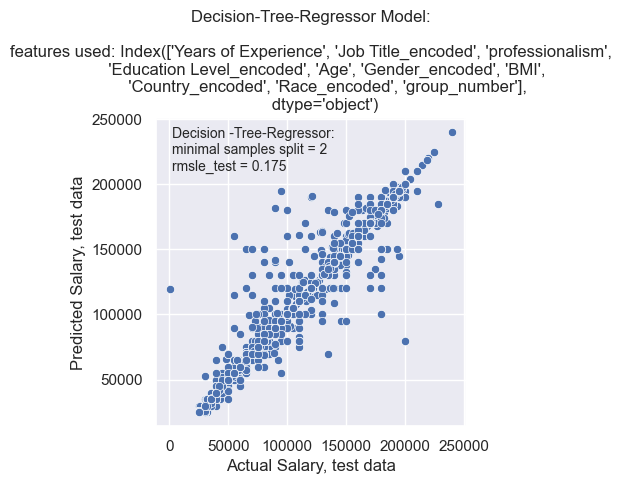



When minimal samples split equals 3:
Decision Tree reg. training model's rmsle is 0.0119
Decision Tree reg. test model's rmsle is 0.1766
the difference between train's and test's rmsle's is 0.16



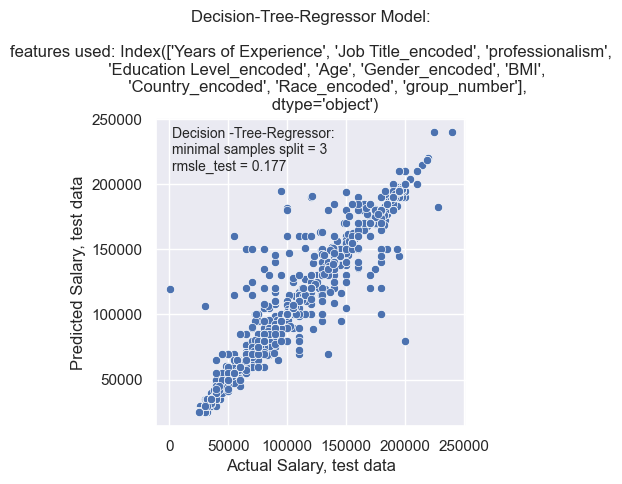



When minimal samples split equals 4:
Decision Tree reg. training model's rmsle is 0.0720
Decision Tree reg. test model's rmsle is 0.1722
the difference between train's and test's rmsle's is 0.10



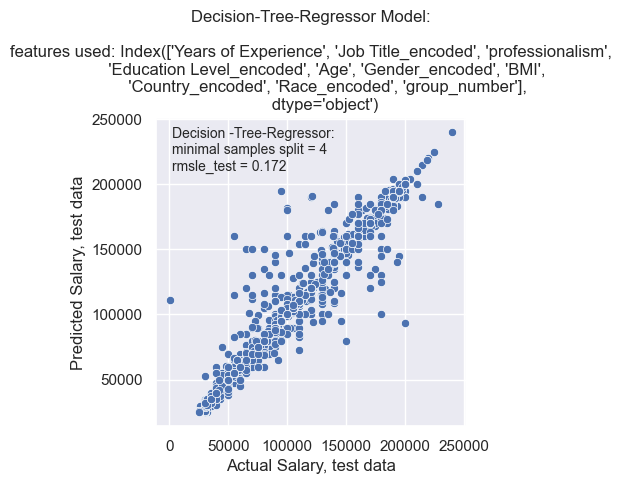



When minimal samples split equals 5:
Decision Tree reg. training model's rmsle is 0.1028
Decision Tree reg. test model's rmsle is 0.1760
the difference between train's and test's rmsle's is 0.07



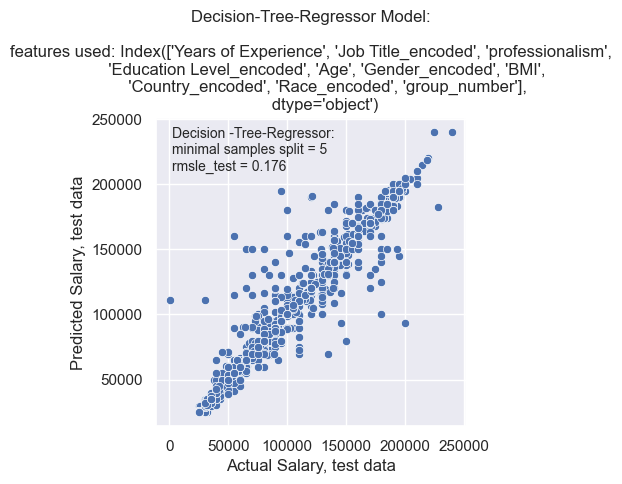



When minimal samples split equals 6:
Decision Tree reg. training model's rmsle is 0.1053
Decision Tree reg. test model's rmsle is 0.1726
the difference between train's and test's rmsle's is 0.07



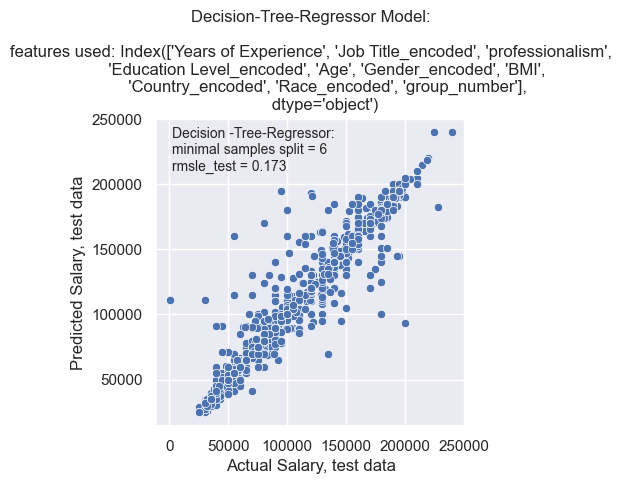



When minimal samples split equals 7:
Decision Tree reg. training model's rmsle is 0.1084
Decision Tree reg. test model's rmsle is 0.1695
the difference between train's and test's rmsle's is 0.06



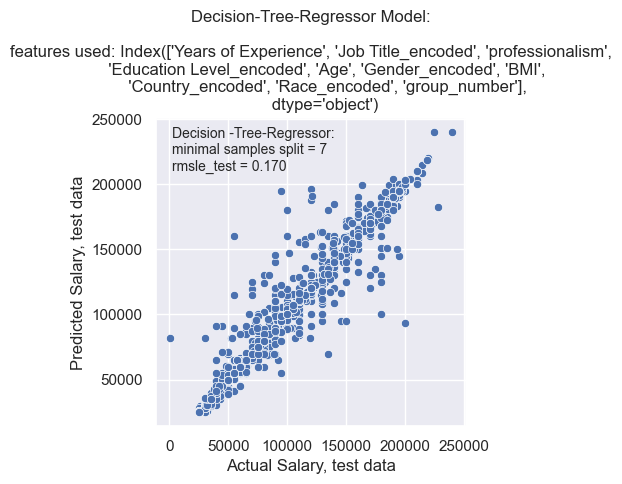



When minimal samples split equals 8:
Decision Tree reg. training model's rmsle is 0.1100
Decision Tree reg. test model's rmsle is 0.1686
the difference between train's and test's rmsle's is 0.06



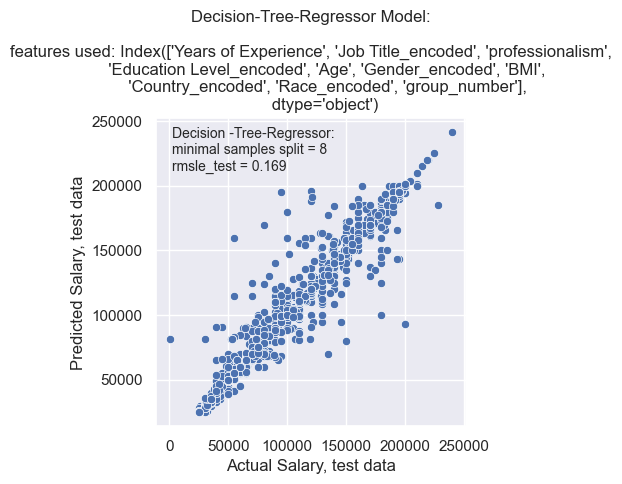



When minimal samples split equals 9:
Decision Tree reg. training model's rmsle is 0.1106
Decision Tree reg. test model's rmsle is 0.1677
the difference between train's and test's rmsle's is 0.06



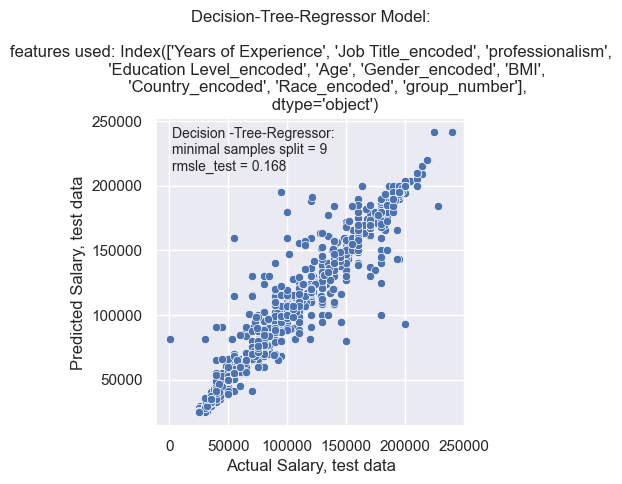



When minimal samples split equals 10:
Decision Tree reg. training model's rmsle is 0.1112
Decision Tree reg. test model's rmsle is 0.1698
the difference between train's and test's rmsle's is 0.06



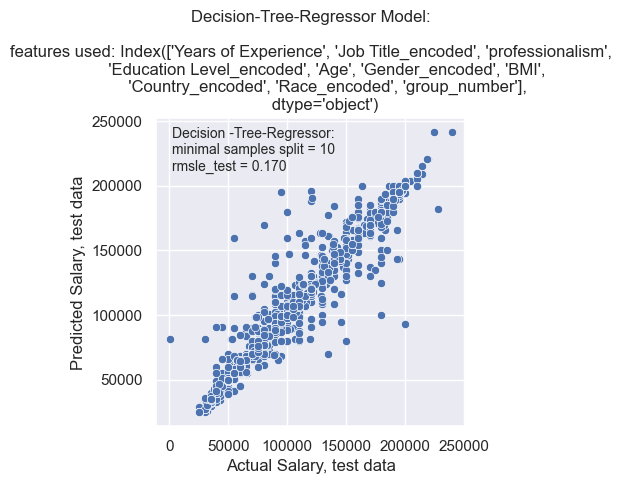



When minimal samples split equals 11:
Decision Tree reg. training model's rmsle is 0.1125
Decision Tree reg. test model's rmsle is 0.1690
the difference between train's and test's rmsle's is 0.06



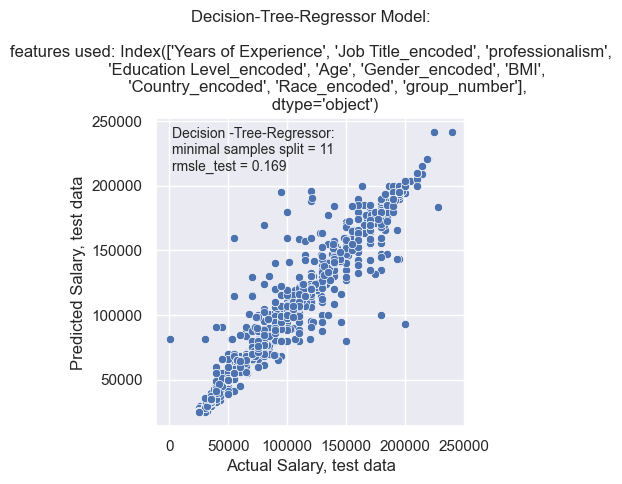



When minimal samples split equals 12:
Decision Tree reg. training model's rmsle is 0.1136
Decision Tree reg. test model's rmsle is 0.1678
the difference between train's and test's rmsle's is 0.05



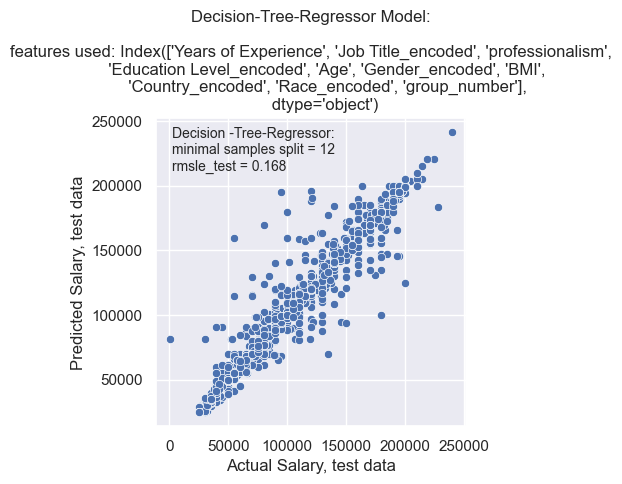



When minimal samples split equals 13:
Decision Tree reg. training model's rmsle is 0.1147
Decision Tree reg. test model's rmsle is 0.1670
the difference between train's and test's rmsle's is 0.05



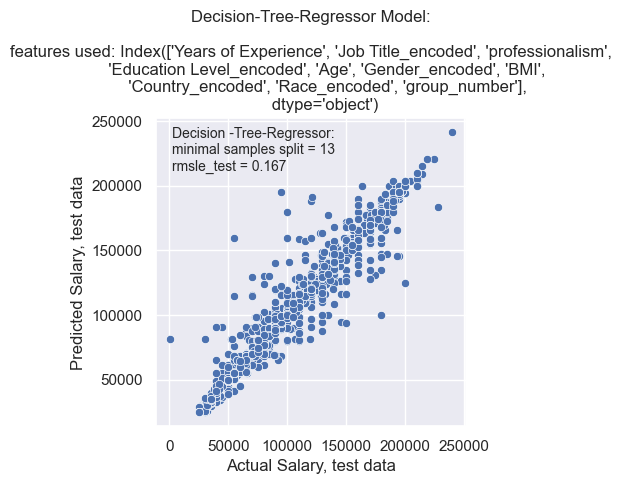



When minimal samples split equals 14:
Decision Tree reg. training model's rmsle is 0.1153
Decision Tree reg. test model's rmsle is 0.1664
the difference between train's and test's rmsle's is 0.05



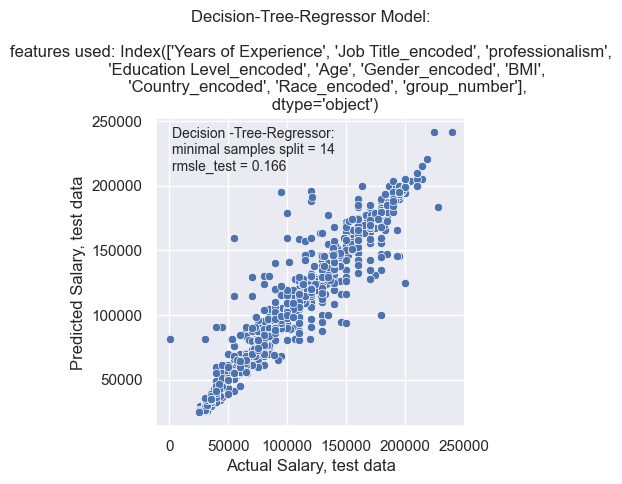



When minimal samples split equals 15:
Decision Tree reg. training model's rmsle is 0.1170
Decision Tree reg. test model's rmsle is 0.1682
the difference between train's and test's rmsle's is 0.05



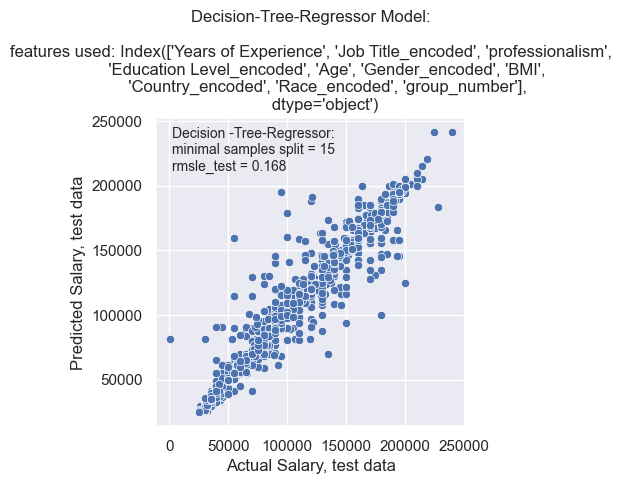



When minimal samples split equals 16:
Decision Tree reg. training model's rmsle is 0.1177
Decision Tree reg. test model's rmsle is 0.1683
the difference between train's and test's rmsle's is 0.05



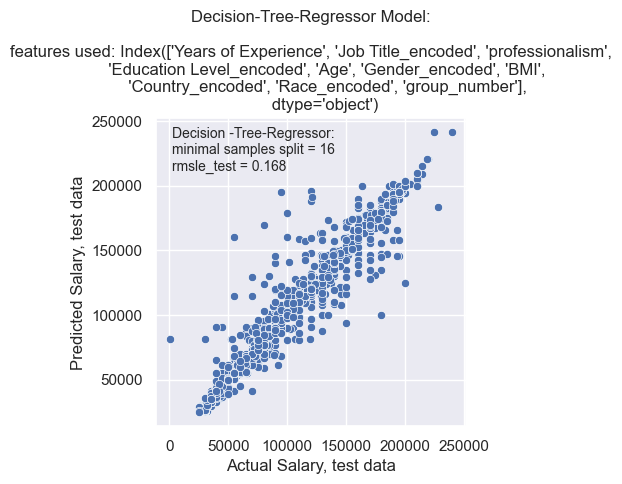



When minimal samples split equals 17:
Decision Tree reg. training model's rmsle is 0.1189
Decision Tree reg. test model's rmsle is 0.1678
the difference between train's and test's rmsle's is 0.05



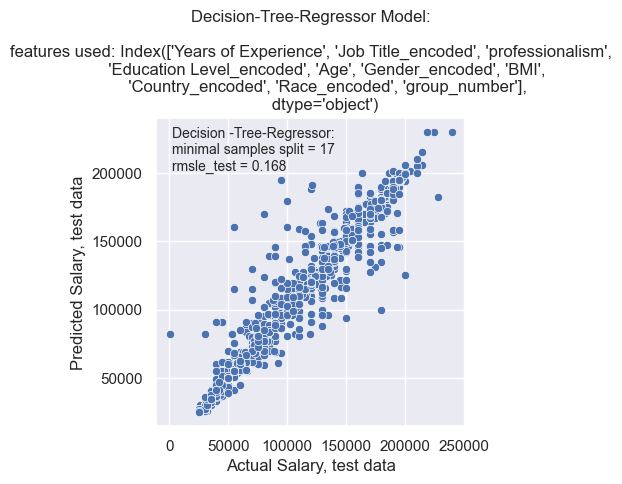



When minimal samples split equals 18:
Decision Tree reg. training model's rmsle is 0.1196
Decision Tree reg. test model's rmsle is 0.1683
the difference between train's and test's rmsle's is 0.05



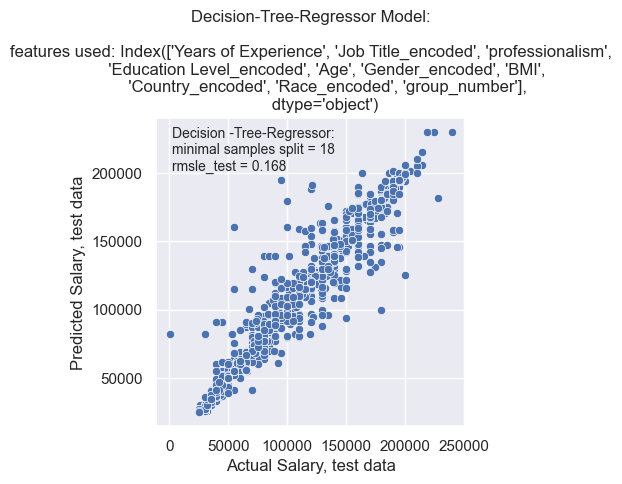



When minimal samples split equals 19:
Decision Tree reg. training model's rmsle is 0.1207
Decision Tree reg. test model's rmsle is 0.1673
the difference between train's and test's rmsle's is 0.05



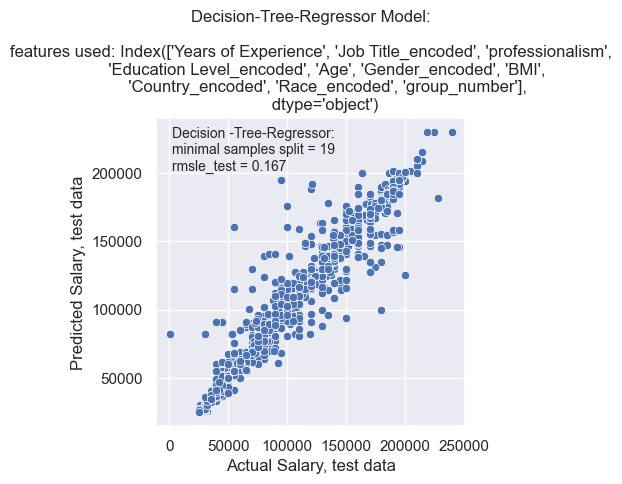



When minimal samples split equals 20:
Decision Tree reg. training model's rmsle is 0.1213
Decision Tree reg. test model's rmsle is 0.1684
the difference between train's and test's rmsle's is 0.05



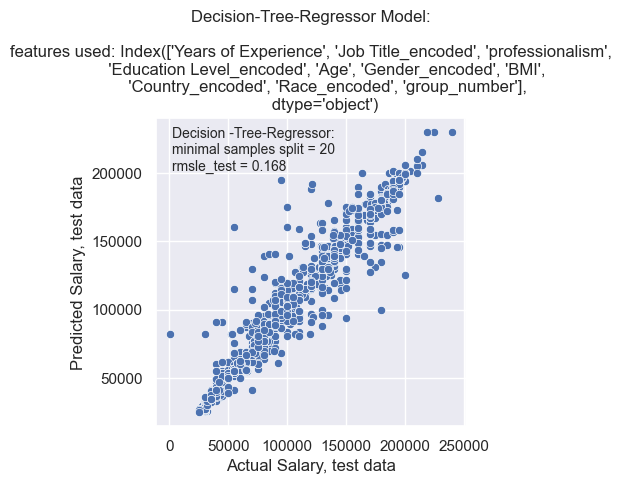



When minimal samples split equals 21:
Decision Tree reg. training model's rmsle is 0.1222
Decision Tree reg. test model's rmsle is 0.1682
the difference between train's and test's rmsle's is 0.05



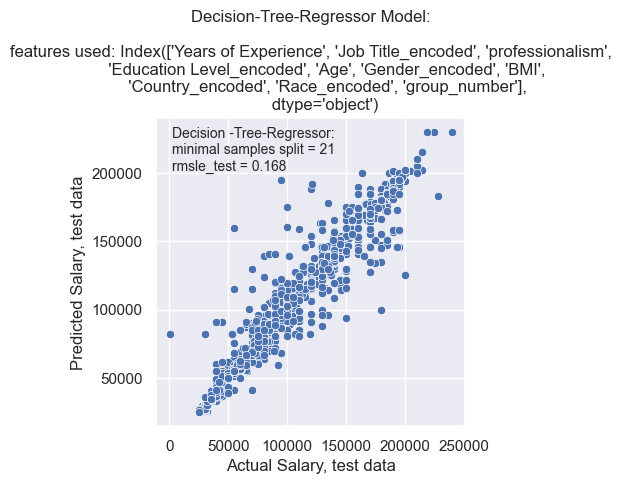



When minimal samples split equals 22:
Decision Tree reg. training model's rmsle is 0.1227
Decision Tree reg. test model's rmsle is 0.1691
the difference between train's and test's rmsle's is 0.05



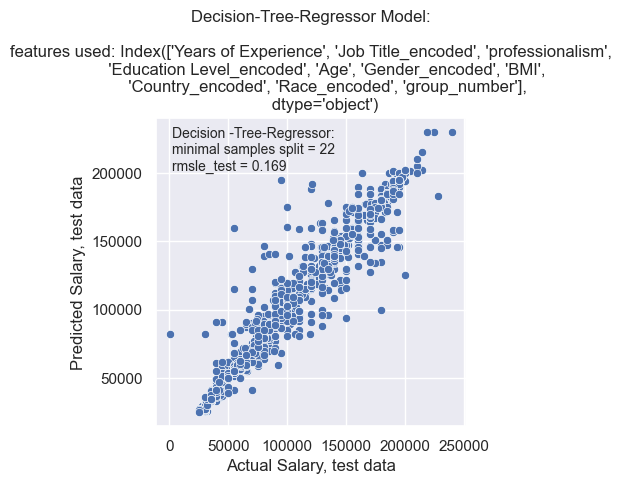



When minimal samples split equals 23:
Decision Tree reg. training model's rmsle is 0.1237
Decision Tree reg. test model's rmsle is 0.1692
the difference between train's and test's rmsle's is 0.05



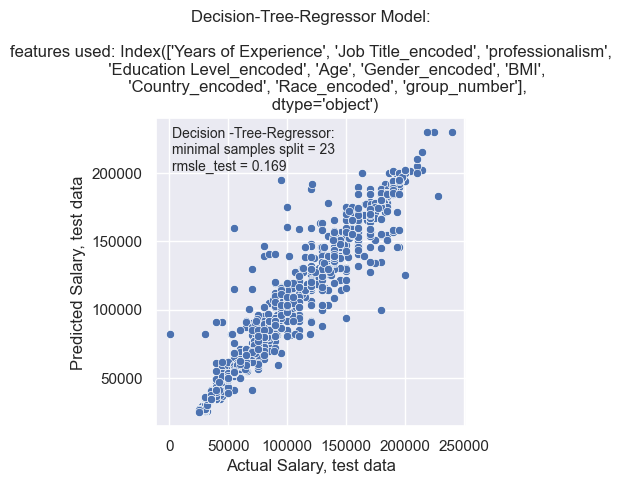



When minimal samples split equals 24:
Decision Tree reg. training model's rmsle is 0.1250
Decision Tree reg. test model's rmsle is 0.1692
the difference between train's and test's rmsle's is 0.04



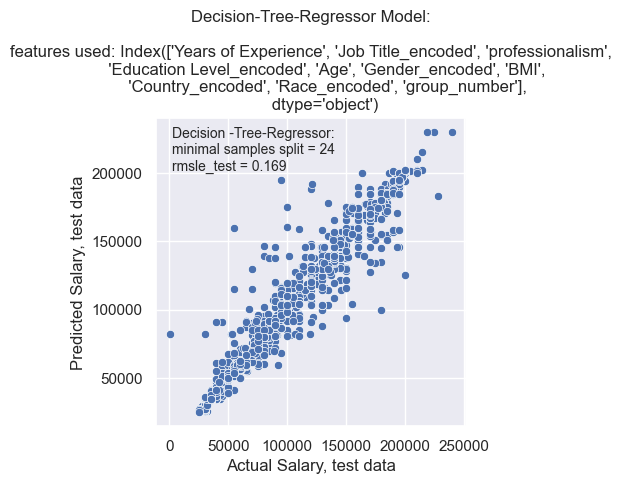



When minimal samples split equals 25:
Decision Tree reg. training model's rmsle is 0.1262
Decision Tree reg. test model's rmsle is 0.1695
the difference between train's and test's rmsle's is 0.04



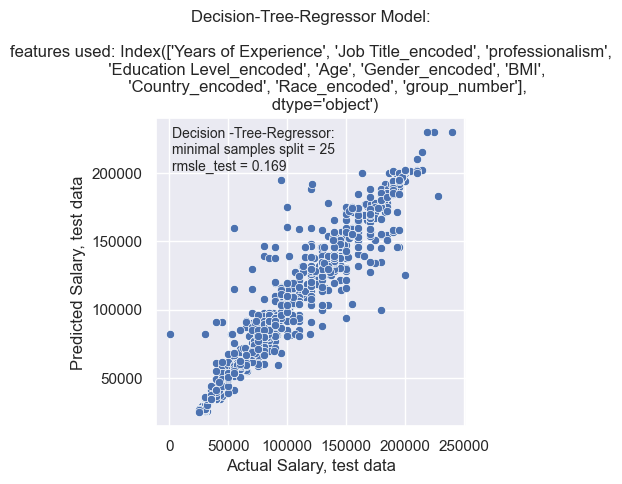



When minimal samples split equals 26:
Decision Tree reg. training model's rmsle is 0.1269
Decision Tree reg. test model's rmsle is 0.1698
the difference between train's and test's rmsle's is 0.04



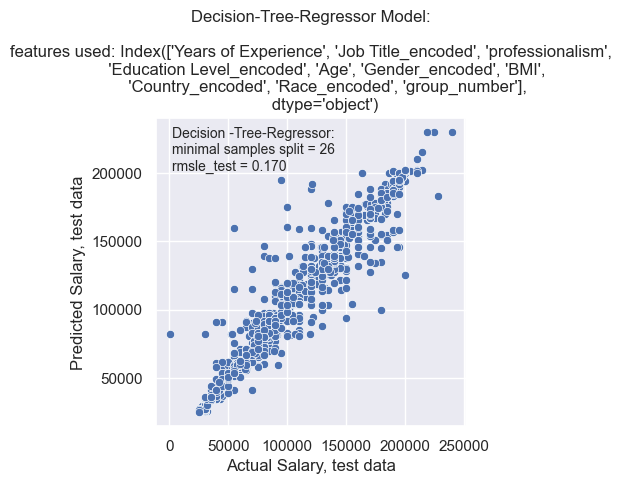



When minimal samples split equals 27:
Decision Tree reg. training model's rmsle is 0.1297
Decision Tree reg. test model's rmsle is 0.1695
the difference between train's and test's rmsle's is 0.04



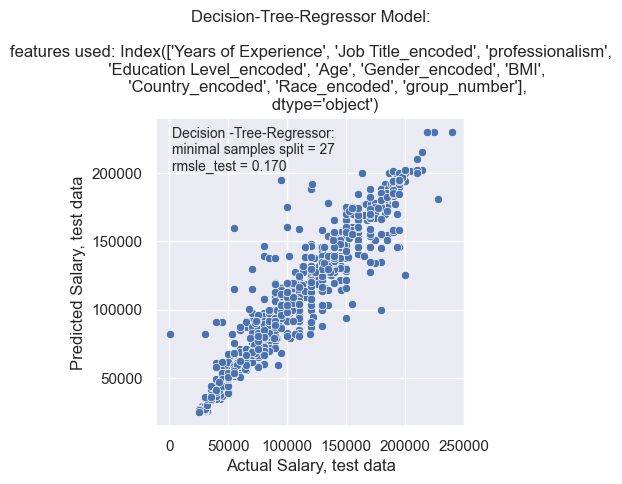



When minimal samples split equals 28:
Decision Tree reg. training model's rmsle is 0.1297
Decision Tree reg. test model's rmsle is 0.1695
the difference between train's and test's rmsle's is 0.04



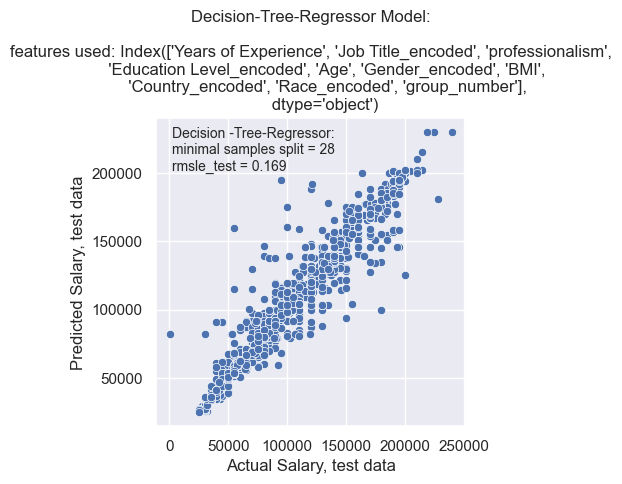



When minimal samples split equals 29:
Decision Tree reg. training model's rmsle is 0.1307
Decision Tree reg. test model's rmsle is 0.1695
the difference between train's and test's rmsle's is 0.04



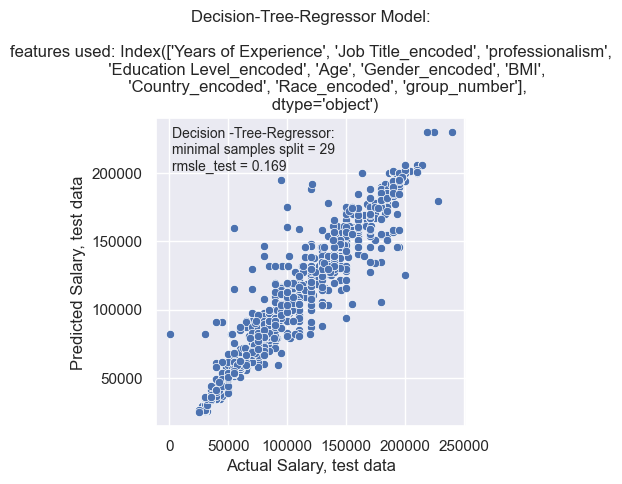



When minimal samples split equals 30:
Decision Tree reg. training model's rmsle is 0.1316
Decision Tree reg. test model's rmsle is 0.1701
the difference between train's and test's rmsle's is 0.04



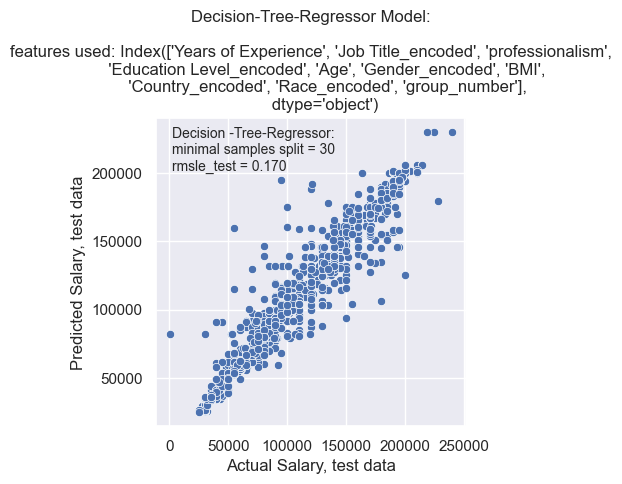



When minimal samples split equals 31:
Decision Tree reg. training model's rmsle is 0.1323
Decision Tree reg. test model's rmsle is 0.1704
the difference between train's and test's rmsle's is 0.04



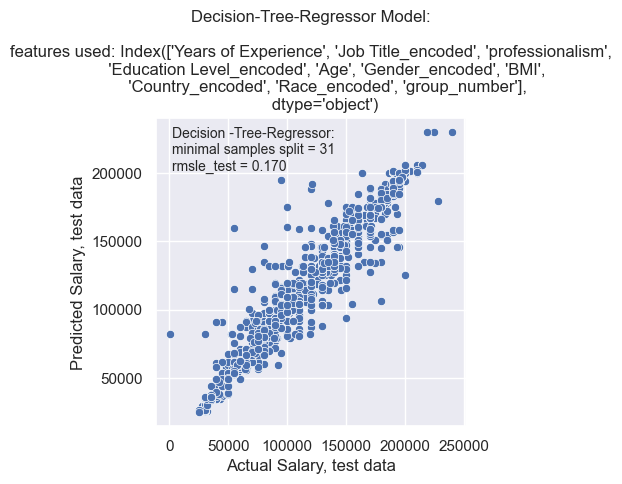



When minimal samples split equals 32:
Decision Tree reg. training model's rmsle is 0.1346
Decision Tree reg. test model's rmsle is 0.1704
the difference between train's and test's rmsle's is 0.04



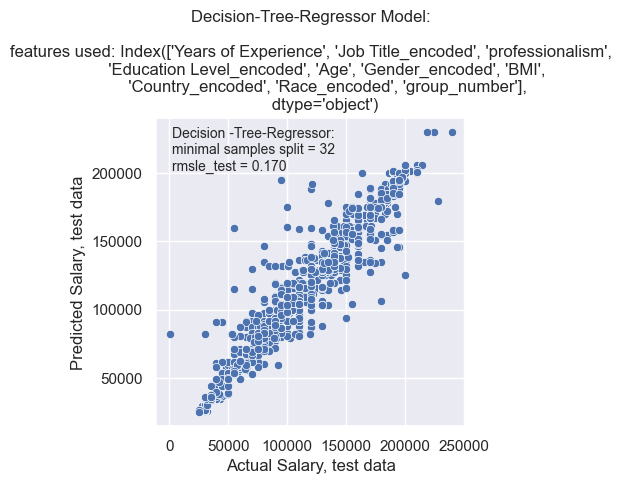



When minimal samples split equals 33:
Decision Tree reg. training model's rmsle is 0.1361
Decision Tree reg. test model's rmsle is 0.1707
the difference between train's and test's rmsle's is 0.03



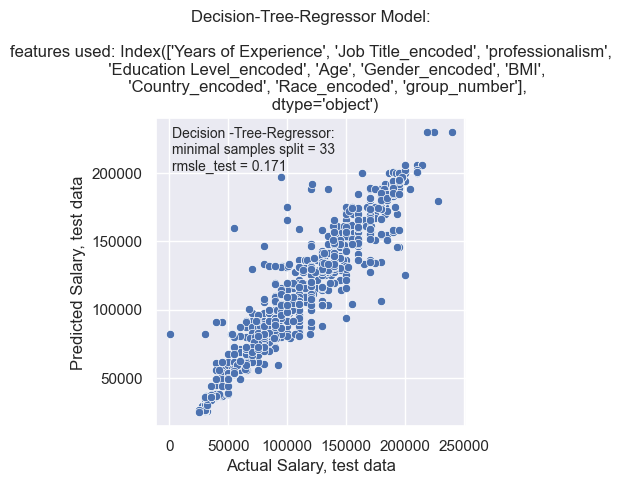



When minimal samples split equals 34:
Decision Tree reg. training model's rmsle is 0.1374
Decision Tree reg. test model's rmsle is 0.1710
the difference between train's and test's rmsle's is 0.03



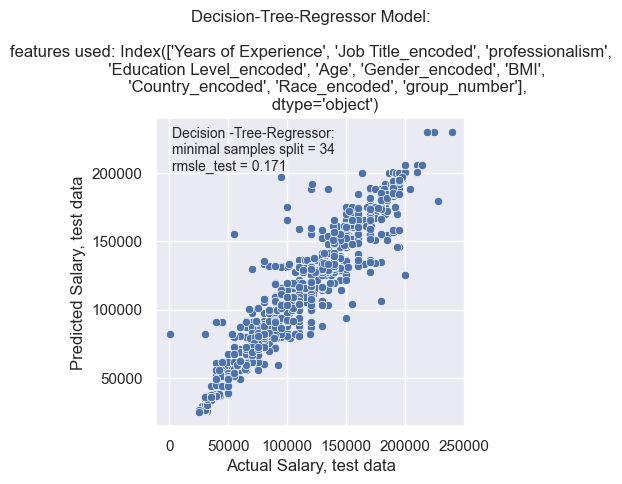



When minimal samples split equals 35:
Decision Tree reg. training model's rmsle is 0.1390
Decision Tree reg. test model's rmsle is 0.1714
the difference between train's and test's rmsle's is 0.03



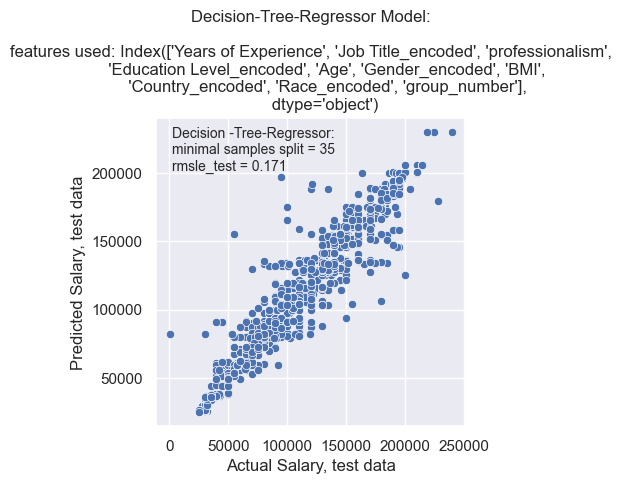



When minimal samples split equals 36:
Decision Tree reg. training model's rmsle is 0.1402
Decision Tree reg. test model's rmsle is 0.1738
the difference between train's and test's rmsle's is 0.03



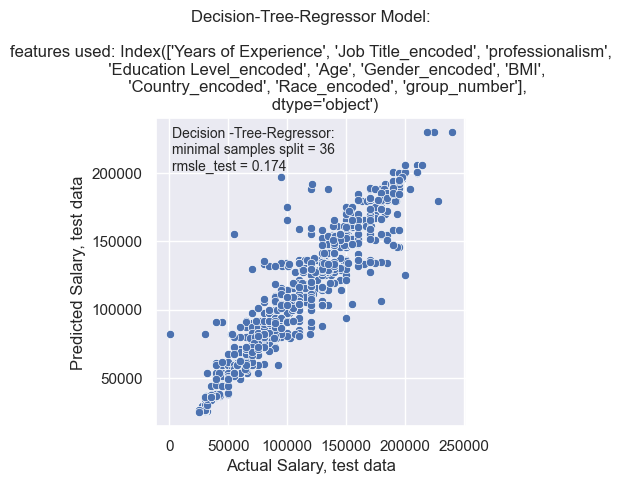



When minimal samples split equals 37:
Decision Tree reg. training model's rmsle is 0.1405
Decision Tree reg. test model's rmsle is 0.1739
the difference between train's and test's rmsle's is 0.03



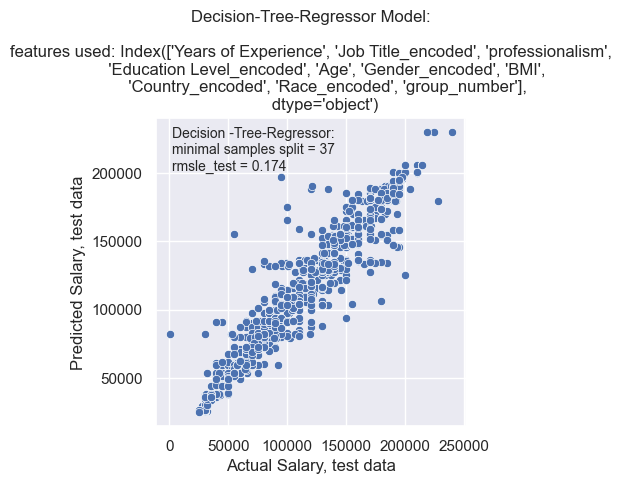



When minimal samples split equals 38:
Decision Tree reg. training model's rmsle is 0.1408
Decision Tree reg. test model's rmsle is 0.1743
the difference between train's and test's rmsle's is 0.03



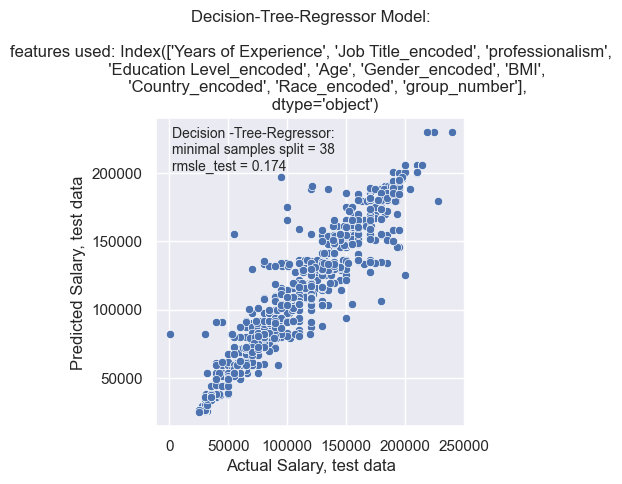



When minimal samples split equals 39:
Decision Tree reg. training model's rmsle is 0.1409
Decision Tree reg. test model's rmsle is 0.1741
the difference between train's and test's rmsle's is 0.03



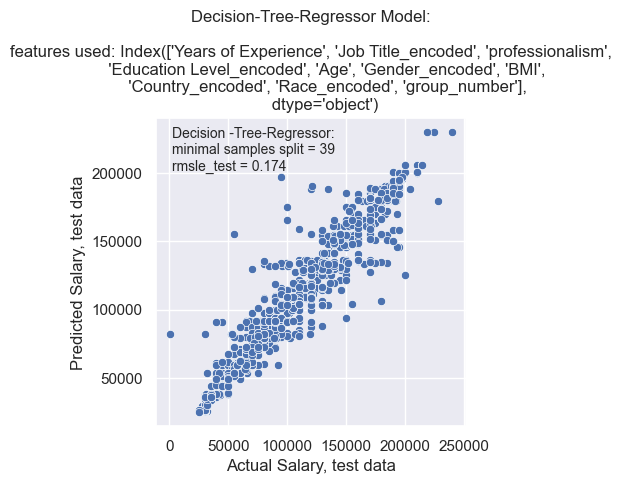



When minimal samples split equals 40:
Decision Tree reg. training model's rmsle is 0.1413
Decision Tree reg. test model's rmsle is 0.1749
the difference between train's and test's rmsle's is 0.03



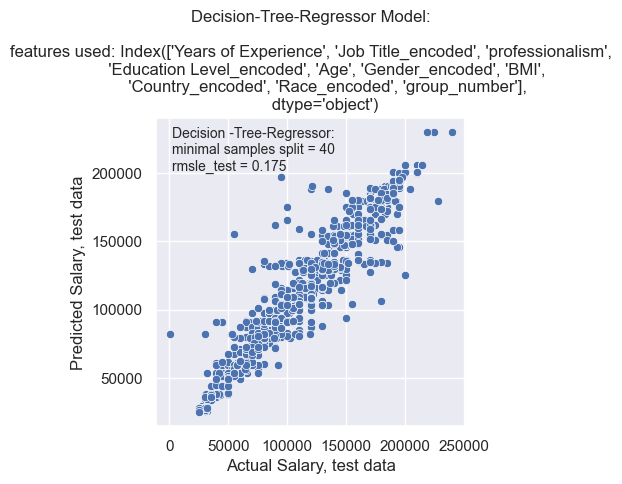



When minimal samples split equals 41:
Decision Tree reg. training model's rmsle is 0.1417
Decision Tree reg. test model's rmsle is 0.1749
the difference between train's and test's rmsle's is 0.03



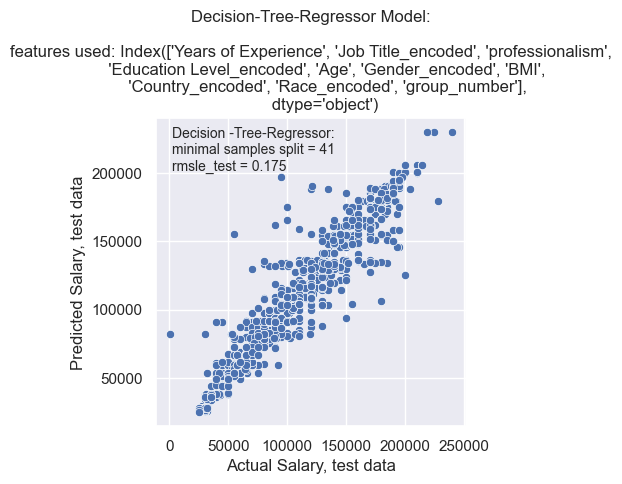



When minimal samples split equals 42:
Decision Tree reg. training model's rmsle is 0.1460
Decision Tree reg. test model's rmsle is 0.1713
the difference between train's and test's rmsle's is 0.03



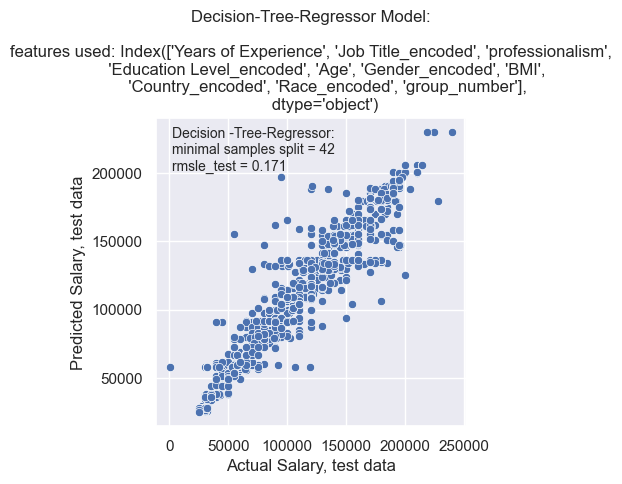



When minimal samples split equals 43:
Decision Tree reg. training model's rmsle is 0.1463
Decision Tree reg. test model's rmsle is 0.1719
the difference between train's and test's rmsle's is 0.03



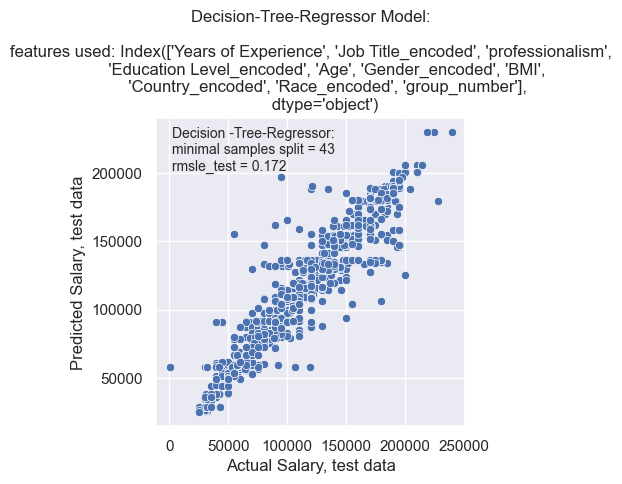



When minimal samples split equals 44:
Decision Tree reg. training model's rmsle is 0.1468
Decision Tree reg. test model's rmsle is 0.1722
the difference between train's and test's rmsle's is 0.03



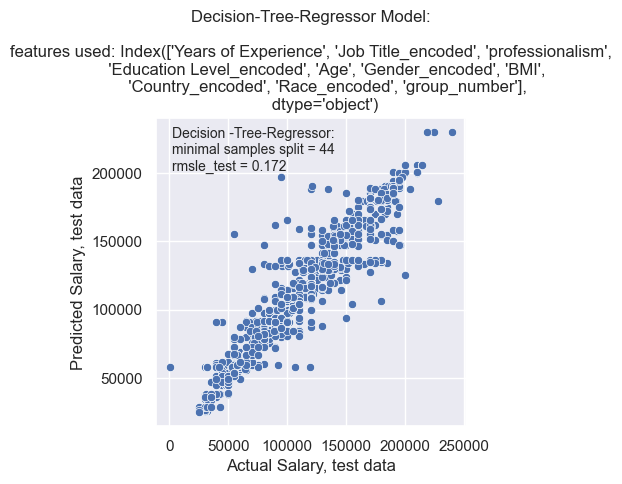



When minimal samples split equals 45:
Decision Tree reg. training model's rmsle is 0.1471
Decision Tree reg. test model's rmsle is 0.1720
the difference between train's and test's rmsle's is 0.02



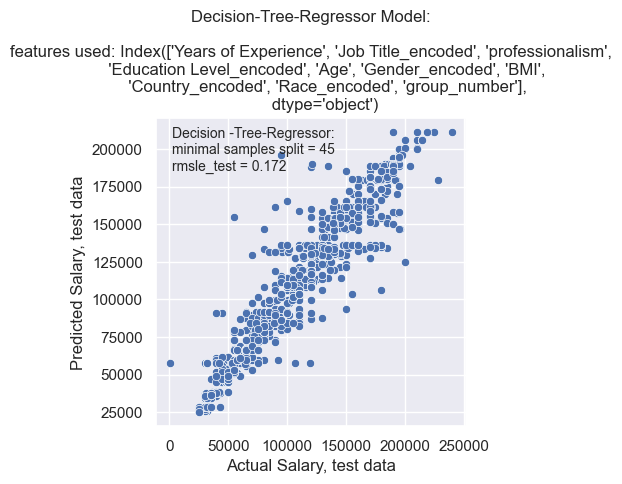



When minimal samples split equals 46:
Decision Tree reg. training model's rmsle is 0.1474
Decision Tree reg. test model's rmsle is 0.1718
the difference between train's and test's rmsle's is 0.02



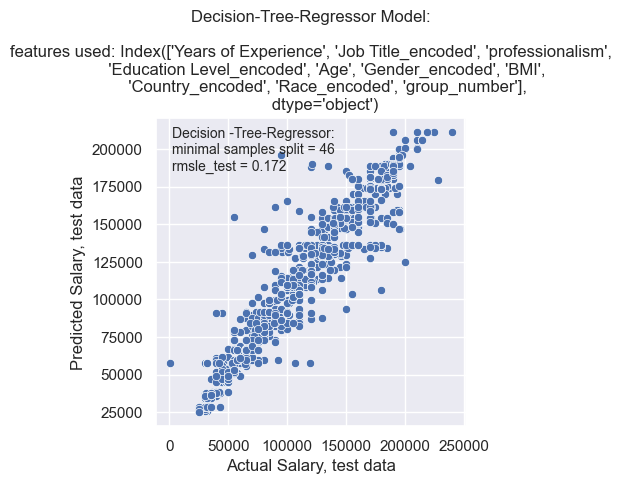



When minimal samples split equals 47:
Decision Tree reg. training model's rmsle is 0.1482
Decision Tree reg. test model's rmsle is 0.1730
the difference between train's and test's rmsle's is 0.02



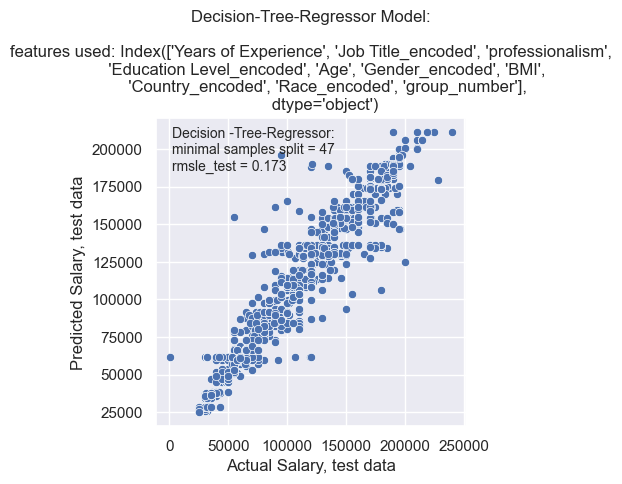



When minimal samples split equals 48:
Decision Tree reg. training model's rmsle is 0.1482
Decision Tree reg. test model's rmsle is 0.1730
the difference between train's and test's rmsle's is 0.02



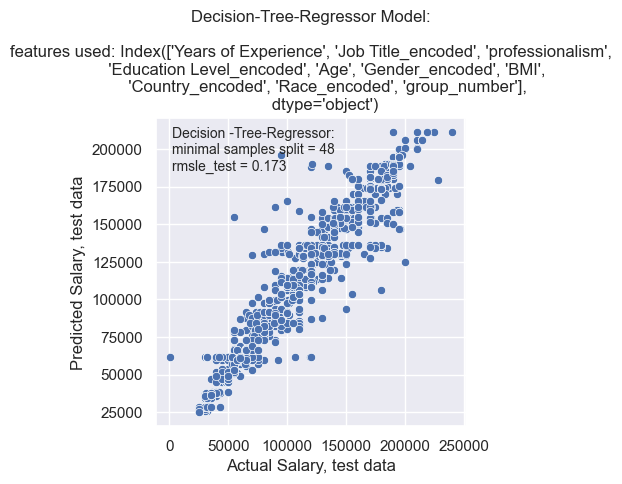



When minimal samples split equals 49:
Decision Tree reg. training model's rmsle is 0.1482
Decision Tree reg. test model's rmsle is 0.1727
the difference between train's and test's rmsle's is 0.02



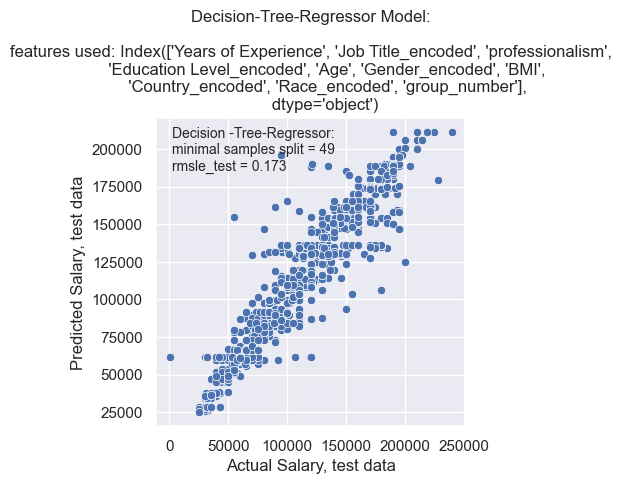



When minimal samples split equals 50:
Decision Tree reg. training model's rmsle is 0.1487
Decision Tree reg. test model's rmsle is 0.1738
the difference between train's and test's rmsle's is 0.03



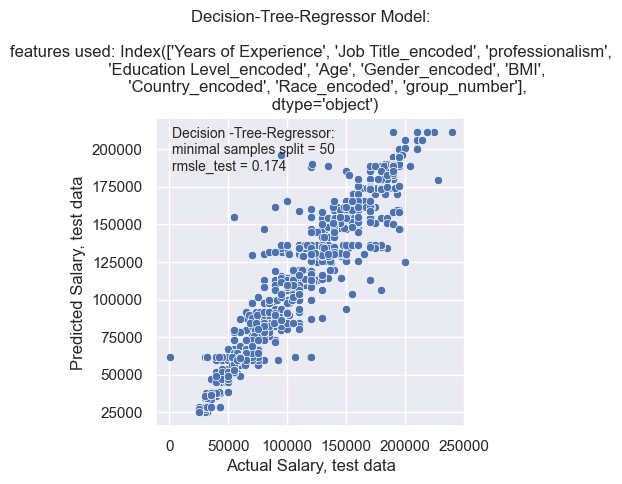

In [168]:
####################################################################
# Running Decision Tree Regressor, to get feature importance attribute
####################################################################

min_samples_split = list(range(2,50+1,1))

min_smp_splits, rmsle_trains, rmsle_tests = [],[],[]

for val in min_samples_split:
  # instantiate class object
  dtr = DecisionTreeRegressor(min_samples_split = val)

  # fit
  dtr.fit(X_train, y_train)

  # predict
  y_pred_train_dtr = dtr.predict(X_train)
  y_pred_test_dtr = dtr.predict(X_test)


  # score
  dtr_train_rmsle = rmsle(y_train, y_pred_train_dtr)
  dtr_test_rmsle = rmsle(y_test, y_pred_test_dtr)
    
  min_smp_splits.append(val)
  rmsle_trains.append(dtr_train_rmsle)
  rmsle_tests.append(dtr_test_rmsle)
    
  # print scoring stats
  print(f"When minimal samples split equals {val}:")
  print(f"Decision Tree reg. training model's rmsle is {dtr_train_rmsle:.4f}")
  print(f"Decision Tree reg. test model's rmsle is {dtr_test_rmsle:.4f}")
  print(f"the difference between train's and test's rmsle's is {dtr_test_rmsle - dtr_train_rmsle:.2f}\n")  

  # plot
  fig, ax = plt.subplots()
  sns.scatterplot(x = y_test, y = y_pred_test_dtr, ax = ax)
  ax.text(x=0.05, y=0.82, s= f'Decision -Tree-Regressor:\nminimal samples split = {val}\nrmsle_test = {dtr_test_rmsle:.3f}', fontsize=10, ha='left', va='bottom', transform=ax.transAxes)
    
  sns.set(rc={'figure.figsize':(4,4)})
  plt.title(f"Decision-Tree-Regressor Model:\n\nfeatures used: {X_train.columns}")
  plt.xlabel('Actual Salary, test data')
  plt.ylabel('Predicted Salary, test data')
  plt.show()
  print('\n')
    
    
# sns.scatterplot(x = y_test, y = y_pred, ax = ax, color = 'g')
# ax.text(x=0.05, y=0.9, s= f'linear Regression\nrmsle_test = {lm_rmsle:.3f}', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)
  



Text(0, 0.5, 'rmsle, \n(model evaluation method)')

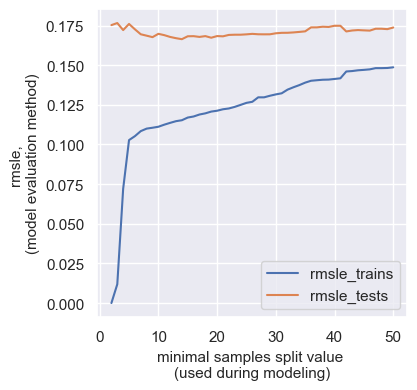

In [180]:
# Plotting the decision tree regressor model: rmsle test vs. minimal samples split value

dtr_df = pd.DataFrame(data = {'rmsle_trains': rmsle_trains,
                              'rmsle_tests':rmsle_tests}, 
                              index = min_smp_splits) 
dtr_df.plot()
plt.xlabel('minimal samples split value \n(used during modeling)', fontsize = 11)
plt.ylabel('rmsle, \n(model evaluation method)', fontsize = 11)

In [116]:
# getting DecisionTreeRegressor model's feature_importance_ attribute
importances = list(dtr.fit(X_train, y_train).feature_importances_.round(3))
columns = X_train.columns.values.tolist()
res = []

for column,importance in zip(columns,importances):
    res.append((column, importance))
res.sort(key = lambda x:x[1], reverse = True)
print(res)

[('Years of Experience', 0.699), ('Job Title_encoded', 0.117), ('professionalism', 0.093), ('Education Level_encoded', 0.056), ('Age', 0.033), ('Gender_encoded', 0.001), ('BMI', 0.0), ('Country_encoded', 0.0), ('Race_encoded', 0.0)]


In [117]:
# extracting the list of features based on their decision tree importance
features_by_dtr_importance = [res[i][0] for i in range(len(res))]
features_by_dtr_importance

['Years of Experience',
 'Job Title_encoded',
 'professionalism',
 'Education Level_encoded',
 'Age',
 'Gender_encoded',
 'BMI',
 'Country_encoded',
 'Race_encoded']

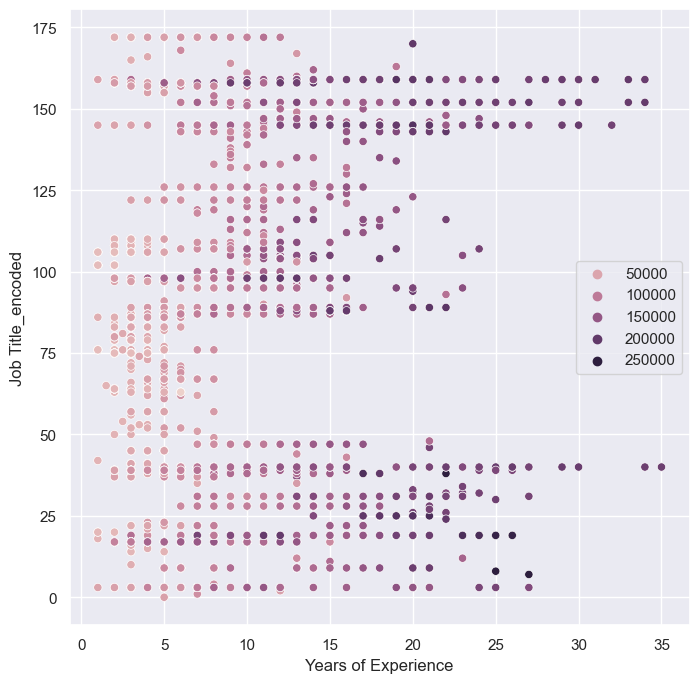

In [182]:
# plotting the most tree-based important features with hue = 'Salary'
sns.scatterplot(data = X_train.join(y_train),x= 'Years of Experience', y = 'Job Title_encoded', hue = 'Salary')
sns.set(rc={'figure.figsize':(8,8)})

plt.legend(loc = 'center right')

In [119]:
# reordering columns df by dtr-based feature importance
d3 = d2[features_by_dtr_importance]

In [120]:
from sklearn.metrics import mean_squared_error as mse

def my_fit(X,y):
  X=X.join(y)
  model2 = X.groupby('group_number')[y.name].mean()
  return model2

def my_predict(X,model2):
  y_pred2 = X.group_number.map(model2)
  return y_pred2

def rmsle(y_true: pd.Series, y_pred:pd.Series):
    return (((np.log1p(y_true)-np.log1p(y_pred))**2).mean())**0.5

5343
per train data, model's rmse based on ['Years of Experience'] is: 27264.0
per train data, model's rmsle based on ['Years of Experience'] is: 0.30089


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


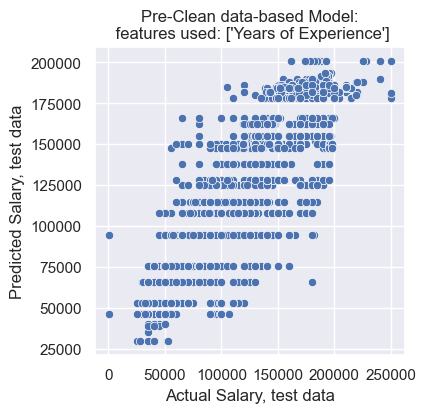



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded'] is: 12922.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded'] is: 0.15565


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


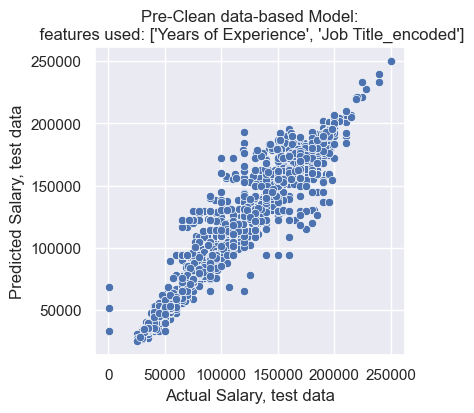



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded', 'professionalism'] is: 5267.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism'] is: 0.09713


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


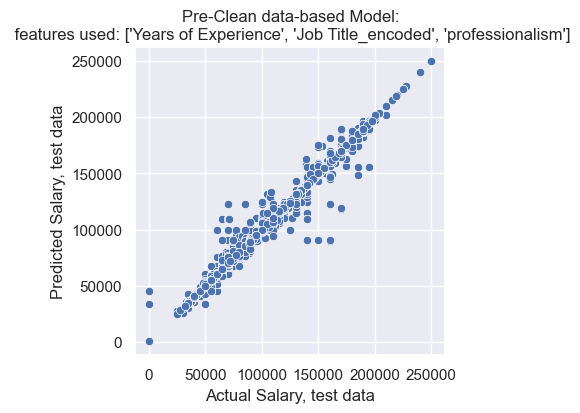



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded'] is: 3197.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded'] is: 0.08883


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


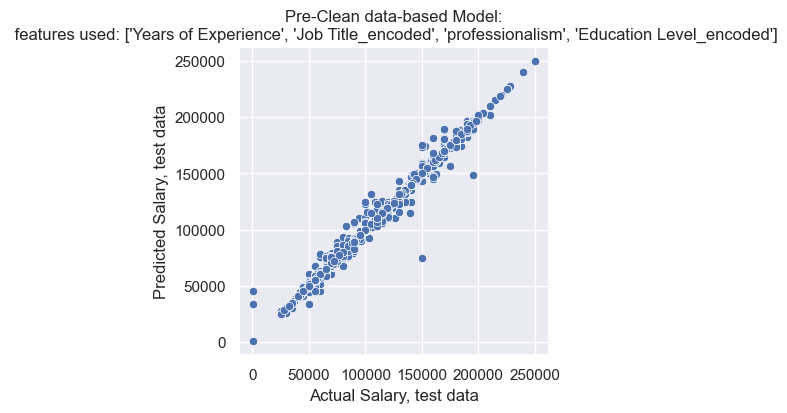



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age'] is: 2961.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age'] is: 0.08506


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


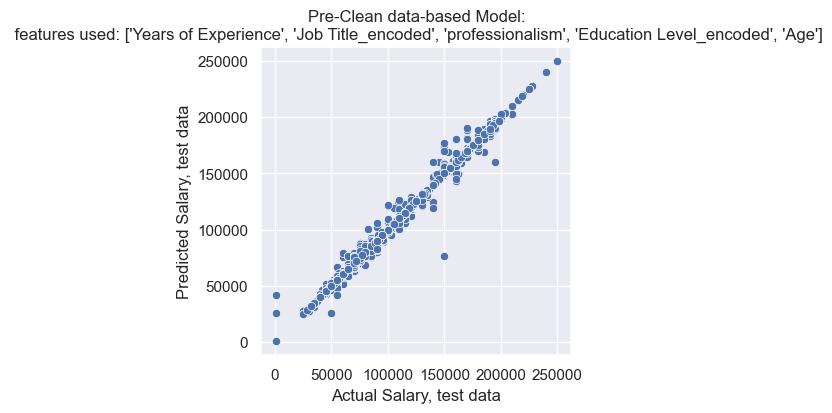



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded'] is: 2251.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded'] is: 0.08289


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


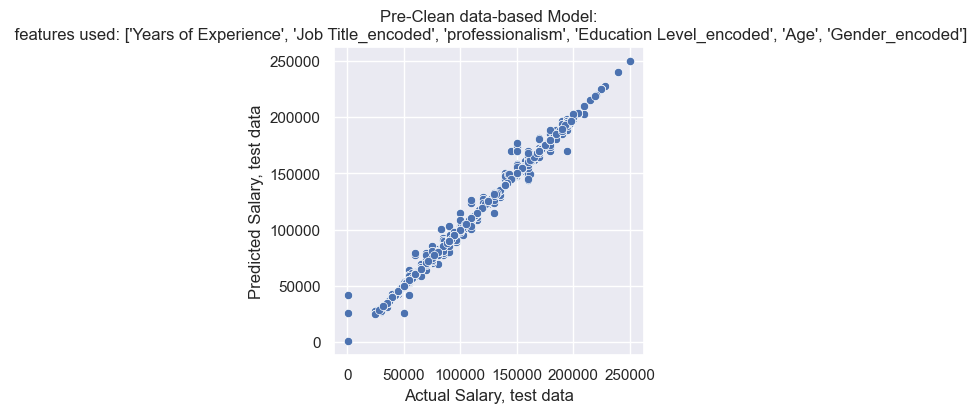



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI'] is: 367.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI'] is: 0.00369


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


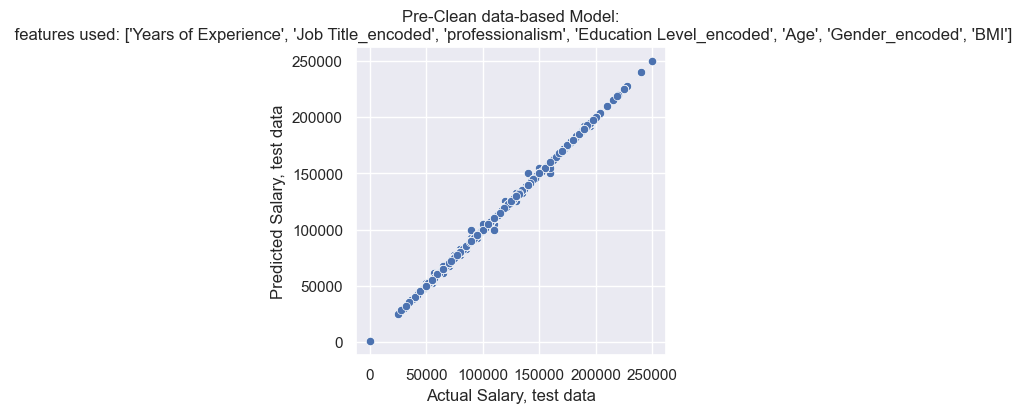



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded'] is: 199.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded'] is: 0.00201


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


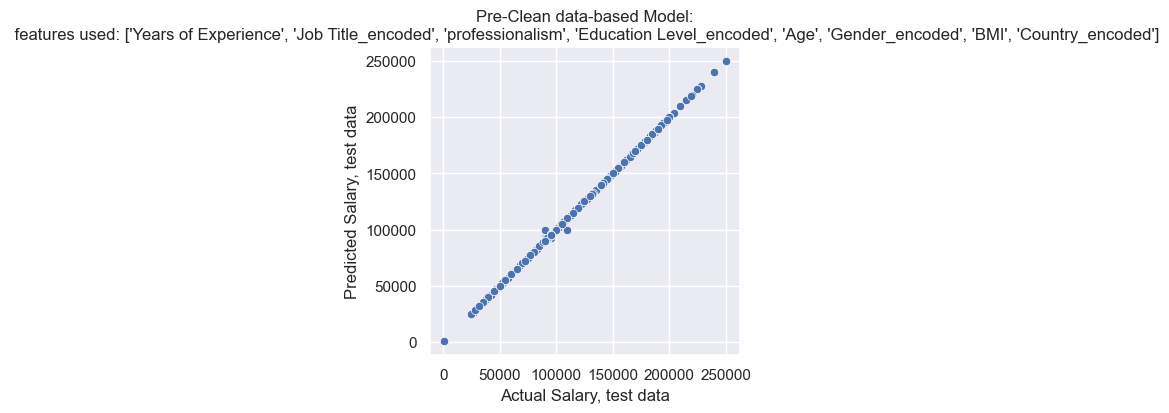



5343
per train data, model's rmse based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded', 'Race_encoded'] is: 193.0
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded', 'Race_encoded'] is: 0.00194


C:\Users\user\AppData\Local\Temp\ipykernel_20328\835816769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


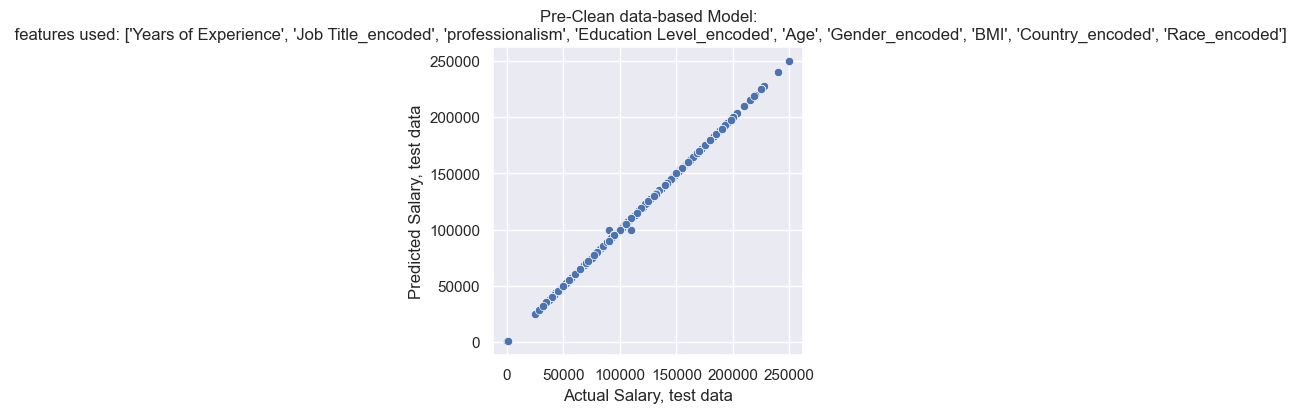

In [184]:
# testing performance of a group-by.mean() custom model
# No test_train_split step is done here to maximize model performance on task's REAL X_test dataset
# redefining X and y
X = d3
y = d2.Salary

for i in range(1,len(X.columns.values)):
    
  # itterate over tested feature combinations
  features = list(X.columns[:i].values)
  # features = ['Country_encoded', 'Race_encoded']

  # create an X Series grouped by chosen features; each unique feature combination is group-numbered
  X['group_number'] = X.groupby(features).ngroup()

#   # split the datasets to train and test
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # create a model per selected features using train data
  # model = my_fit(X_train,y_train)
  model = my_fit(X,y)

  # predict y (price) per X_test and model
  # y_pred_train = my_predict(X_train, model)  
  # y_pred_test = my_predict(X_test, model)
  # print(y_pred_test.loc[~y_pred_test.isnull()].size)
    
  y_pred_train = my_predict(X, model)  
  # y_pred_test = my_predict(X, model)
  print(y_pred_train.loc[~y_pred_train.isnull()].size)

  # # calc & print model's rmsle
  # rmsle_train = rmsle(y_train,y_pred_train)
  # rmsle_test = rmsle(y_test,y_pred_test)
  rmsle_train = rmsle(y,y_pred_train)
  rmse_train = np.sqrt(mse(y, y_pred_train))

  print(f"per train data, model's rmse based on {features} is: {rmse_train.round(0)}")
  print(f"per train data, model's rmsle based on {features} is: {rmsle_train.round(5)}")
  # print(f"per test data, model's rmsle based on {features} is: {rmsle_test.round(5)}\n")

  # plot
  fig, ax = plt.subplots()
  sns.scatterplot(x = y.values, y = y_pred_train.values)
  sns.set(rc={'figure.figsize':(4,4)})
  plt.title(f"Pre-Clean data-based Model:\n features used: {features}")
  plt.xlabel('Actual Salary, test data')
  plt.ylabel('Predicted Salary, test data')
  plt.show()
  print('\n')

In [122]:
# Making sure there are no Nulls
# y_pred_train.sort_values().unique()

In [123]:
# file_path = "./data/X_test.csv"
# task_X_test = pd.read_csv(file_path)

# task_X_test.info()

In [185]:
###############################################################################################################
# Getting the REAL X_test (with currently unknown y actual values) through the same data transformation steps #
###############################################################################################################

file_path = "./data/X_test.csv"
task_X_test = pd.read_csv(file_path)

# task_X_test.info()

# setting 'id' column as index
task_X_test.set_index('id', inplace = True)

# removing redundant/extra columns

task_X_test.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

# # Adding a BMI column: BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared
task_X_test['BMI'] = task_X_test['weight']/(task_X_test['height']**2)

# clear all null lines
for column in task_X_test.columns:
    nulls_mask = task_X_test[column].notnull()  # or column_with_nulls.isna()
    task_X_test = task_X_test[nulls_mask]
    
# changing 'Age' to int
task_X_test['Age'] = task_X_test['Age'].astype(int)

# Removing the 'O' gender rows (2)
task_X_test = task_X_test.loc[task_X_test['Gender'] != 'O']

# rounding 'height' values to 2 decimal points
task_X_test['height'] = round(task_X_test['height']/0.01)*0.01

# rounding weight feature values to no decimal points
task_X_test['weight'] = round(task_X_test['weight'],0).astype(int)

# rounding BMI value to 1 decimal point
task_X_test['BMI'] = round(task_X_test['BMI'],1)

# deal with categorial columns
label_encoder = LabelEncoder()
for column in task_X_test.select_dtypes(include=['object']).columns:
    task_X_test[column + '_encoded'] = label_encoder.fit_transform(task_X_test[column])
    
# Re-Ordering the df features by 'feature_importance' reported by the DecisionTreeRegressor algo
task_X_test = task_X_test[features_by_dtr_importance]

In [125]:
# testing performance of a group-by.mean() custom model on this Task's X_test dataset

for i in range(1,len(task_X_test.columns.values)):
    
  # itterate over tested feature combinations
  features = list(task_X_test.columns[:i].values)

  # create an X Series grouped by chosen features; each unique feature combination is group-numbered
  task_X_test['group_number'] = task_X_test.groupby(features).ngroup()

#   # split the datasets to train and test
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # create a model per selected features using train data
  # model = my_fit(X_train,y_train)
  model = my_fit(X,y)

  # predict y (price) per X_test and model
  # y_pred_train = my_predict(X_train, model)  
  # y_pred_test = my_predict(X_test, model)
  # print(y_pred_test.loc[~y_pred_test.isnull()].size)
    
  y_pred_test = my_predict(task_X_test, model)
   
  # print() the number of non-null rows in y_pred
  print(y_pred_test.loc[~y_pred_test.isnull()].size)

# print() the number of rows in a df
print('\n',len(task_X_test.index))

  # # calc & print model's rmsle
  # rmsle_train = rmsle(y_train,y_pred_train)
  # rmsle_test = rmsle(y_test,y_pred_test)
  # rmsle_train = rmsle(y,y_pred_train)


  # print(f"per train data, model's rmsle based on {features} is: {rmsle_train.round(3)}")
  # print(f"per test data, model's rmsle based on {features} is: {rmsle_test.round(3)}\n")

  # # plot
  # fig, ax = plt.subplots()
  # sns.scatterplot(x = y.values, y = y_pred_train.values)
  # sns.set(rc={'figure.figsize':(4,4)})
  # plt.title(f"Pre-Clean data-based Model:\n features used: {features}")
  # plt.xlabel('Actual Salary, test data')
  # plt.ylabel('Predicted Salary, test data')
  # plt.show()
  # print('\n')

1339
1339
1339
1339
1339
1339
1339
1339

 1339


In [126]:
# # Making sure there are No Missing Values in y_test_pred
# y_pred_test.sort_values().unique()
# y_pred_test.isnull().sum()

1602
per train data, model's rmsle based on ['Years of Experience'] is: 0.29896
per test data, model's rmsle based on ['Years of Experience'] is: 0.30738
The [rmsle_test/rmsle_train] ratio = 1.03



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


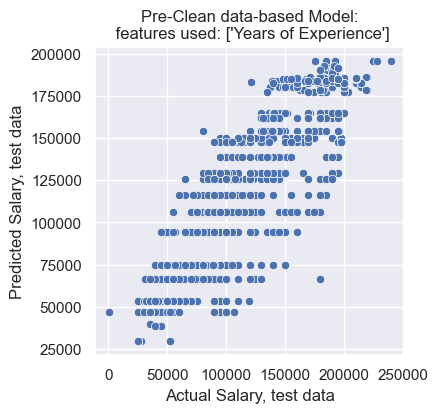



1523
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded'] is: 0.15027
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded'] is: 0.18011
The [rmsle_test/rmsle_train] ratio = 1.20



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


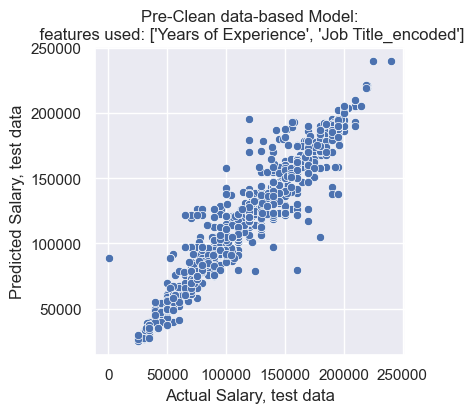



1287
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism'] is: 0.10929
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism'] is: 0.07145
The [rmsle_test/rmsle_train] ratio = 0.65



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


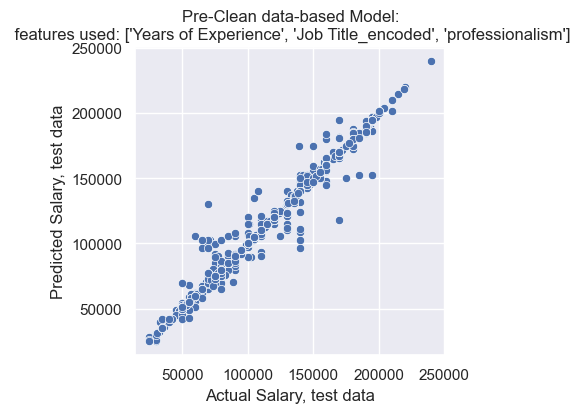



1252
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded'] is: 0.10349
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded'] is: 0.04363
The [rmsle_test/rmsle_train] ratio = 0.42



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


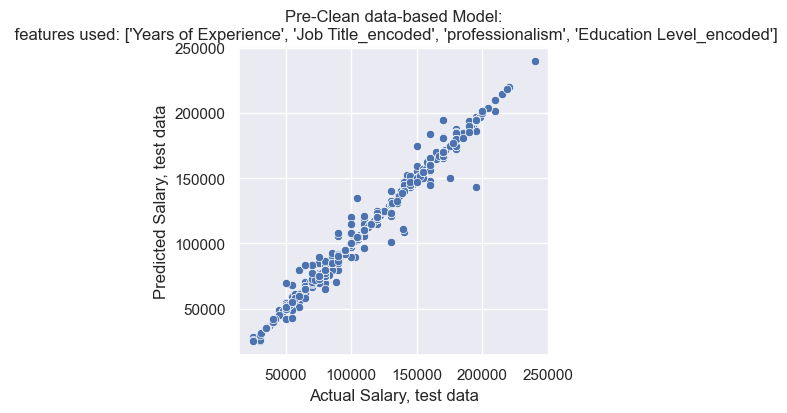



1072
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age'] is: 0.0985
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age'] is: 0.04782
The [rmsle_test/rmsle_train] ratio = 0.49



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


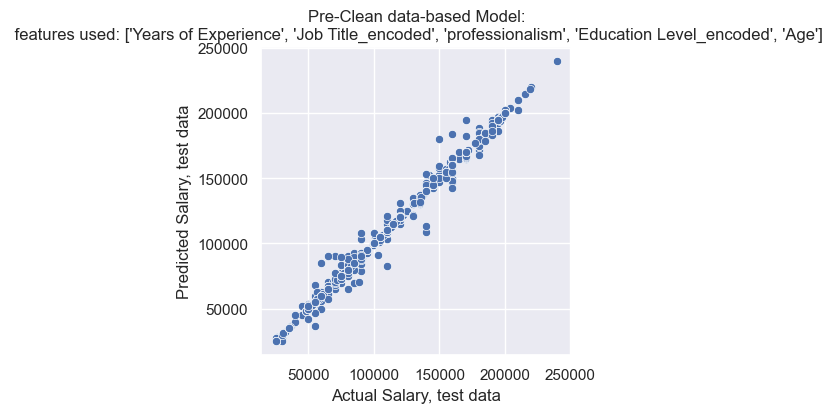



1030
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded'] is: 0.09659
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded'] is: 0.03713
The [rmsle_test/rmsle_train] ratio = 0.38



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


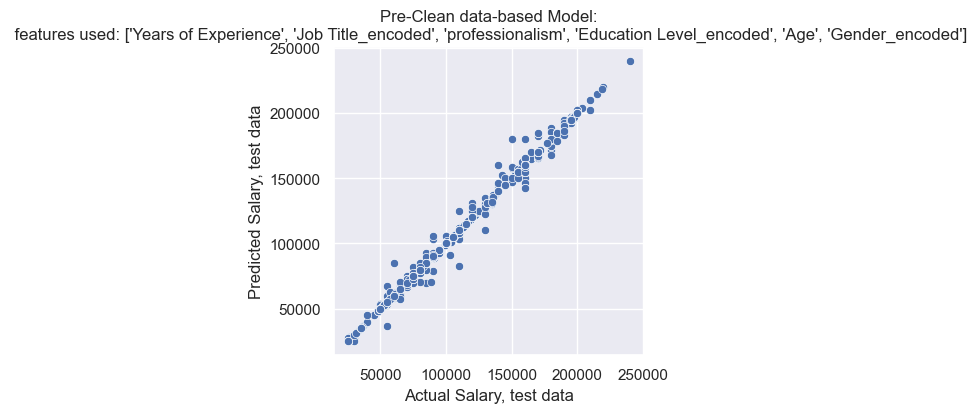



19
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI'] is: 0.00309
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI'] is: 0.05644
The [rmsle_test/rmsle_train] ratio = 18.27



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()


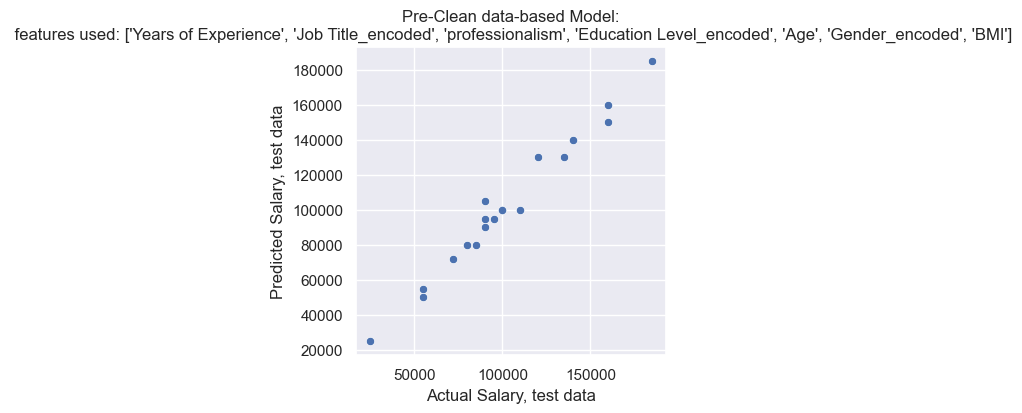



4
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded'] is: 0.0
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded'] is: 0.10391
The [rmsle_test/rmsle_train] ratio = inf



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()
C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"The [rmsle_test/rmsle_train] ratio = {rmsle_test/rmsle_train:.2f}\n")
C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  rmsle_test_train_ratio.append(f"{rmsle_test/rmsle_train:.2f}")


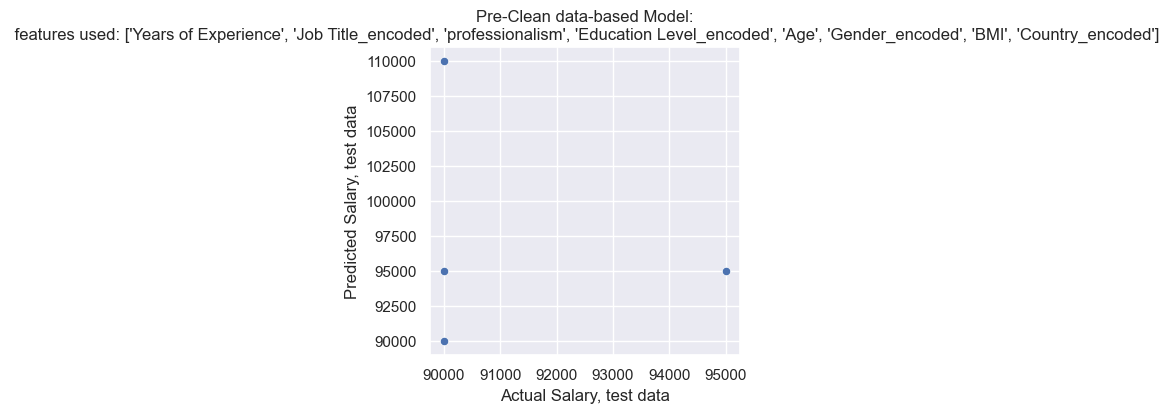



1
per train data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded', 'Race_encoded'] is: 0.0
per test data, model's rmsle based on ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded', 'BMI', 'Country_encoded', 'Race_encoded'] is: 0.20067
The [rmsle_test/rmsle_train] ratio = inf



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(features).ngroup()
C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"The [rmsle_test/rmsle_train] ratio = {rmsle_test/rmsle_train:.2f}\n")
C:\Users\user\AppData\Local\Temp\ipykernel_20328\2061802815.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  rmsle_test_train_ratio.append(f"{rmsle_test/rmsle_train:.2f}")


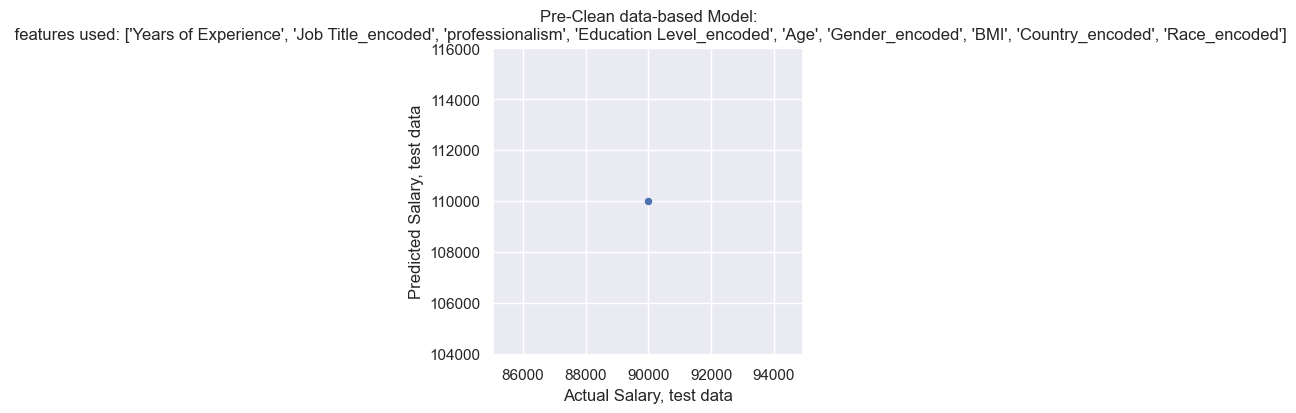

In [127]:
#######################################################################################################
# Repeating training step on 95% of the data to save 5% for test-data model performance estimation ####
#######################################################################################################

# testing performance of a group-by.mean() custom model
# Here I DO test_train_split step to enable testing for model's overfit

# redefining X and y
X = d3
y = d2.Salary

rmsle_test_train_ratio = []
nfeatures = []
rmsle_tests, rmsle_trains = [],[]

for i in range(1,len(X.columns.values)):
    
  # itterate over tested feature combinations
  features = list(X.columns[:i].values)
  # features = ['Country_encoded', 'Race_encoded']

  # create an X Series grouped by chosen features; each unique feature combination is group-numbered
  X['group_number'] = X.groupby(features).ngroup()

  # split the datasets to train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # create a model per selected features using train data
  model = my_fit(X_train,y_train)
  # model = my_fit(X,y)

  # predict y (price) per X_test and model
  y_pred_train = my_predict(X_train, model)  
  y_pred_test = my_predict(X_test, model)
  print(y_pred_test.loc[~y_pred_test.isnull()].size)
    
  # y_pred_train = my_predict(X, model)  
  # # y_pred_test = my_predict(X, model)
  # print(y_pred_train.loc[~y_pred_train.isnull()].size)

  # # calc & print model's rmsle & rmse
  # rmsle_train = rmsle(y_train,y_pred_train)
  # rmsle_test = rmsle(y_test,y_pred_test)
  rmsle_train = rmsle(y_train,y_pred_train)
  rmsle_test = rmsle(y_test,y_pred_test)
  # rmse_train = np.sqrt(mse(y_train, y_pred_train))
  # rmse_test = np.sqrt(mse(y_test, y_pred_test))

  # print(f"per train data, model's rmse based on {features} is: {rmse_train.round(0)}")
  # print(f"per test data, model's rmse based on {features} is: {rmse_test.round(0)}")
  print(f"per train data, model's rmsle based on {features} is: {rmsle_train.round(5)}")
  print(f"per test data, model's rmsle based on {features} is: {rmsle_test.round(5)}")
  print(f"The [rmsle_test/rmsle_train] ratio = {rmsle_test/rmsle_train:.2f}\n")
  # rmsle_test_train_ratio.append(f"{rmsle_test/rmsle_train:.2f}")
  rmsle_tests.append(rmsle_test.round(4))
  rmsle_trains.append(rmsle_train.round(4))
  rmsle_test_train_ratio.append(f"{rmsle_test/rmsle_train:.2f}")
  nfeatures.append(len(features))
    

  # plot
  fig, ax = plt.subplots()
  sns.scatterplot(x = y_test.values, y = y_pred_test.values)
  sns.set(rc={'figure.figsize':(4,4)})
  plt.title(f"Pre-Clean data-based Model:\n features used: {features}")
  plt.xlabel('Actual Salary, test data')
  plt.ylabel('Predicted Salary, test data')
  plt.show()
  print('\n')

Text(0.5, 0, 'number of features used for modeling')

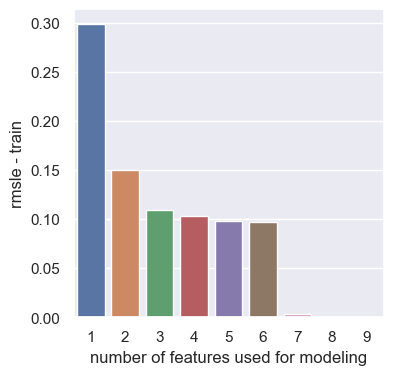

In [128]:
# create a barplot of number of features used vs. rmsle train model scores:
sns.barplot(x = nfeatures,y =  rmsle_trains)
plt.ylabel('rmsle - train')
plt.xlabel('number of features used for modeling')


Text(0.5, 0, 'number of features used for modeling')

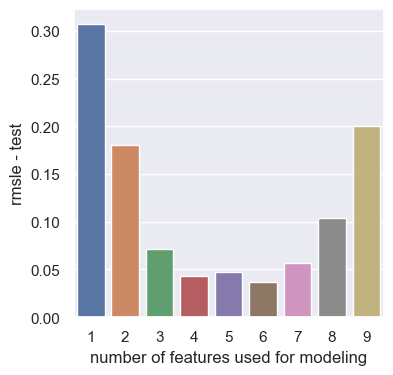

In [129]:
# create a barplot of number of features used vs. rmsle test model scores:
sns.barplot(x = nfeatures,y =  rmsle_tests)
plt.ylabel('rmsle - test')
plt.xlabel('number of features used for modeling')


In [130]:
# Based on the upper analysis the features chosen below yield the minimal rmsle with no model overfit;
# Including any additional feature (out of the following: 'BMI', 'Country_encoded', 'Race_encoded') results in elevated rmse and model overfit 
chosen_model_features = ['Years of Experience', 'Job Title_encoded', 'professionalism', 'Education Level_encoded', 'Age', 'Gender_encoded']

In [131]:
#############################################################################################################################
# Using only the 'chosen_model_features' (see upper cell here) to produce 'Best' y_pred for task's X_test dataset
##############################################################################################################################

# for i in range(1,len(task_X_test.columns.values)):
for i in range(1,2):
    
  # itterate over tested feature combinations
  features = chosen_model_features

  # create an X Series grouped by chosen features; each unique feature combination is group-numbered
  task_X_test['group_number'] = task_X_test.groupby(features).ngroup()

#   # split the datasets to train and test
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # create a model per selected features using train data
  # model = my_fit(X_train,y_train)
  model = my_fit(X,y)

  # predict y (price) per X_test and model
  # y_pred_train = my_predict(X_train, model)  
  # y_pred_test = my_predict(X_test, model)
  # print(y_pred_test.loc[~y_pred_test.isnull()].size)
    
  y_pred_test = my_predict(task_X_test, model)
   
  # print() the number of non-null rows in y_pred
  print(y_pred_test.loc[~y_pred_test.isnull()].size)

# print() the number of rows in a df
print('\n',len(task_X_test.index))

  # # calc & print model's rmsle
  # rmsle_train = rmsle(y_train,y_pred_train)
  # rmsle_test = rmsle(y_test,y_pred_test)
  # rmsle_train = rmsle(y,y_pred_train)


  # print(f"per train data, model's rmsle based on {features} is: {rmsle_train.round(3)}")
  # print(f"per test data, model's rmsle based on {features} is: {rmsle_test.round(3)}\n")

  # # plot
  # fig, ax = plt.subplots()
  # sns.scatterplot(x = y.values, y = y_pred_train.values)
  # sns.set(rc={'figure.figsize':(4,4)})
  # plt.title(f"Pre-Clean data-based Model:\n features used: {features}")
  # plt.xlabel('Actual Salary, test data')
  # plt.ylabel('Predicted Salary, test data')
  # plt.show()
  # print('\n')

1339

 1339


In [132]:
# Making sure there are no Null values in y_pred_test
# y_pred_test.sort_values().unique()
# y_pred_test.isnull().sum()
# y_pred_test.to_dict()

In [133]:
# Verifying indices of tasks_X_test and X are distinct 
# y_pred_test.index.sort_values()
# X['Age'].index.sort_values()

In [134]:
# # testing whether use of all other features (initially neglected) would improve rmsle score

# X2 = data2.drop(columns = ['Salary'])
# y2 = data2.Salary

# from sklearn.metrics import mean_squared_error as mse

# # for i in range(1,len(X2.columns.values)+1):
# # cancelled the upper iteration and prints only feature combination with 'best' rmsle
# for i in range(0,1):
    
#   # itterate over tested feature combinations
#   # features = list(X2.columns[:i].values)
#   features = list(X2.columns[:4].values)
#   # features = ['height_bins', 'weight_bins']

#   # create an X Series grouped by chosen features; each unique feature combination is group-numbered
#   X2['group_number'] = X2.groupby(features).ngroup()

#   # split the datasets to train and test
#   X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

#   # create a model per selected features using train data
#   model2 = my_fit(X2_train,y2_train)

#   # predict y (price) per X_test and model2
#   y_pred2_train = my_predict(X2_train, model2)  
#   y_pred2_test = my_predict(X2_test, model2)

#   # calc & print model's rmsle
#   rmsle2_train = rmsle(y2_train,y_pred2_train)
#   rmsle2_test = rmsle(y2_test,y_pred2_test)

#   print(f"per train data, model's rmsle based on {features} is: {rmsle2_train:.3f}")
#   print(f"per test data, model's rmsle based on {features} is: {rmsle2_test:.3f}")

#   # plot
#   fig, ax = plt.subplots()
#   sns.scatterplot(x = y2_test.values, y = y_pred2_test.values)
#   plt.title(f"Clean data-based Model:\n features used: {features}")
#   plt.xlabel('Actual Salary, test data')
#   plt.ylabel('Predicted Salary, test data')
#   plt.show()
#   print('\n')

In [135]:
# # Validating that this upper finding is random-state-proof

# # custom groupby-based step-wise model, using CLEAN data (data2)

# X3 = data2.drop(columns = 'Salary')
# y3 = data2.Salary

# for i in range(1,len(X2.columns.values)+1):
    
#   # itterate over tested feature combinations
#   features = list(X2.columns[:i].values)
#   # features = ['Country_encoded', 'Race_encoded']

#   # split the datasets to train and test while ev through different random states
#   X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state= np.random.randint(100))

#   # create an X Series grouped by chosen features; each unique feature combination is group-numbered
#   X3['group_number'] = X3.groupby(features).ngroup()

#   # create a model per selected features using train data
#   model3 = my_fit(X3_train,y3_train)

#   # predict y (price) per X_test and model2
#   y_pred3_train = my_predict(X3_train, model3)  
#   y_pred3_test = my_predict(X3_test, model3)

#   # calc & print model's rmsle
#   rmsle3_train = rmsle(y3_train,y_pred3_train)
#   rmsle3_test = rmsle(y3_test,y_pred3_test)

#   # make report
#   report3.append((rmsle2_test.round(3)))
#   # index of minimal value
# result.append(report3.index(min(report3)))
# report3 = []

# print(result)

                 
#   # print(f"per train data, model's rmsle based on {features} is: {rmsle2_train.round(3)}")
#   # print(f"per test data, model's rmsle based on {features} is: {rmsle2_test.round(3)}\n")

When weight equals uniform:
K-Nearest Neighbour Reg. train model's rmsle is 0.1415
K-Nearest Neighbour Reg. test model's rmsle is 0.1771
rmse_test - rmse_train = 0.0355

When weight equals uniform:
K-Nearest Neighbour Reg. train model's rmsle is 0.1415
K-Nearest Neighbour Reg. test model's rmsle is 0.1772
rmse_test - rmse_train = 0.0357

When weight equals uniform:
K-Nearest Neighbour Reg. train model's rmsle is 0.1415
K-Nearest Neighbour Reg. test model's rmsle is 0.1771
rmse_test - rmse_train = 0.0357

When weight equals uniform:
K-Nearest Neighbour Reg. train model's rmsle is 0.1415
K-Nearest Neighbour Reg. test model's rmsle is 0.1771
rmse_test - rmse_train = 0.0357

When weight equals uniform:
K-Nearest Neighbour Reg. train model's rmsle is 0.1415
K-Nearest Neighbour Reg. test model's rmsle is 0.1771
rmse_test - rmse_train = 0.0357

When weight equals distance:
K-Nearest Neighbour Reg. train model's rmsle is 0.0967
K-Nearest Neighbour Reg. test model's rmsle is 0.1672
rmse_test - 

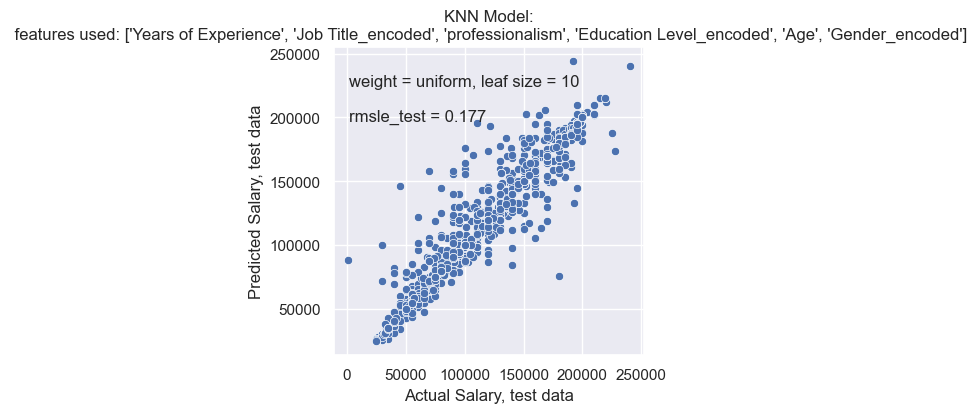

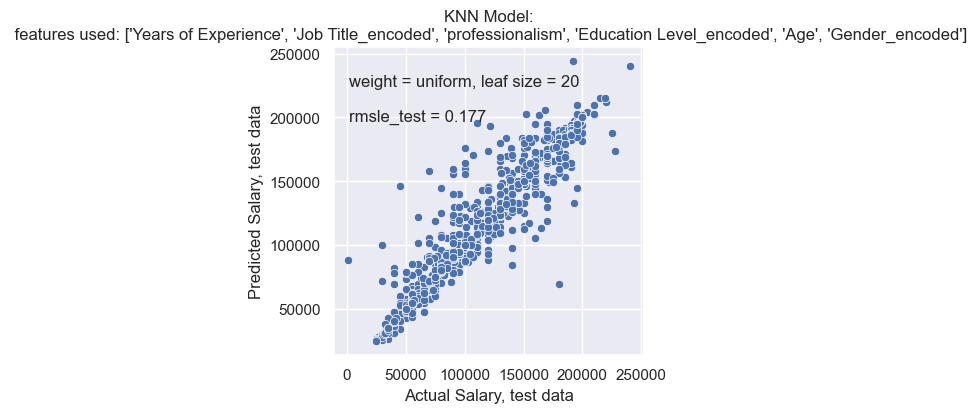

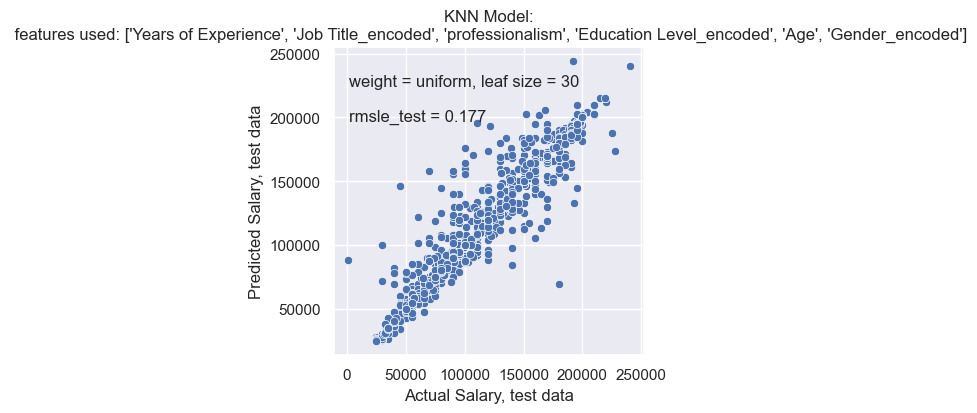

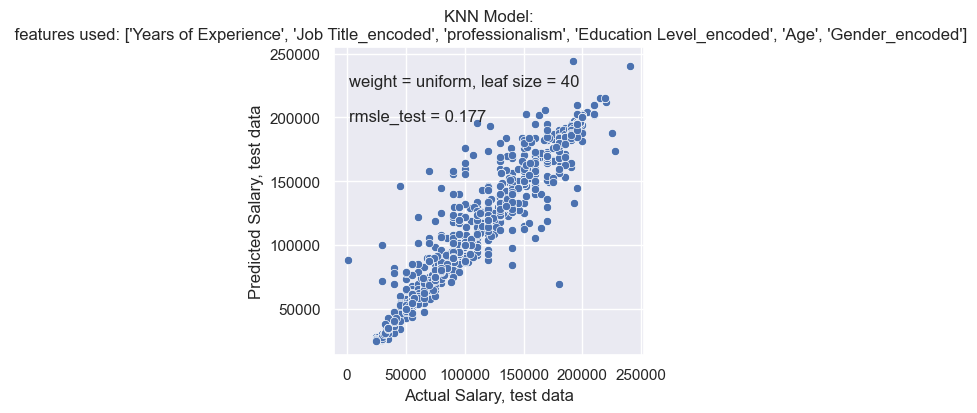

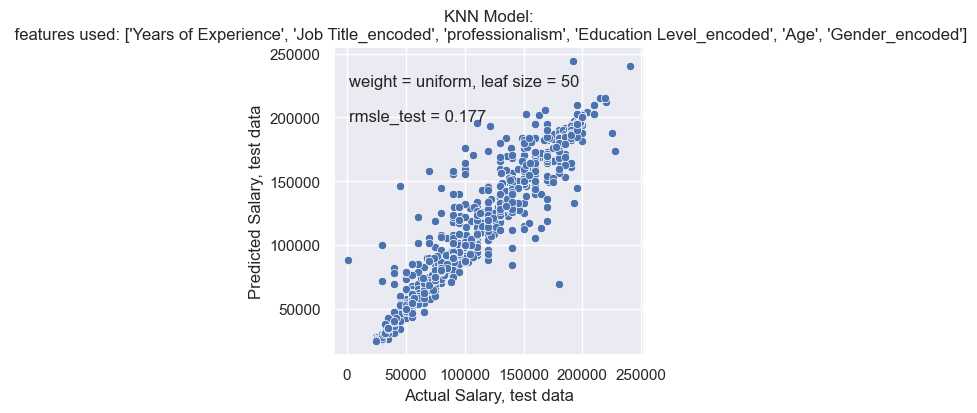

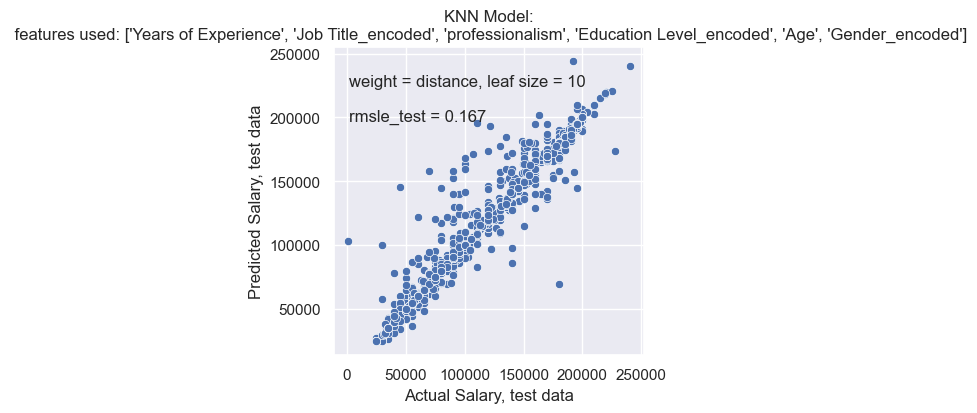

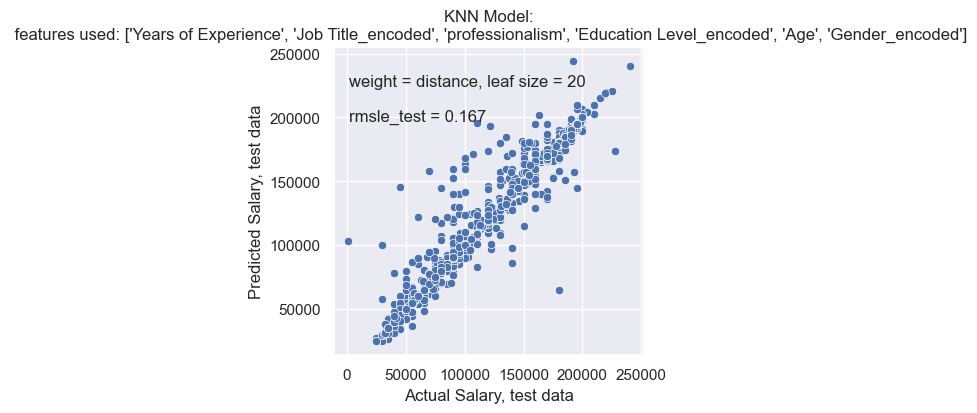

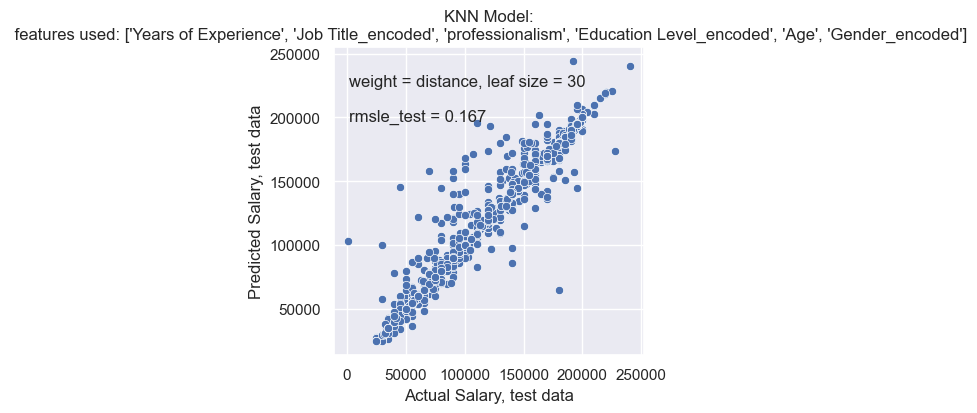

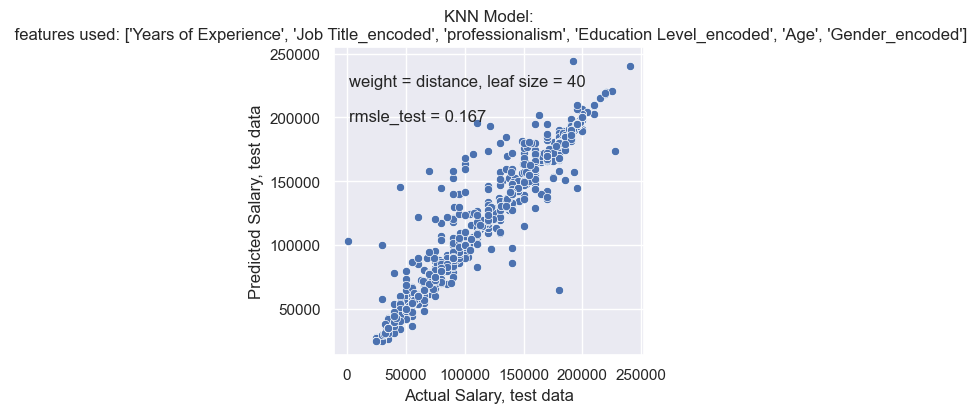

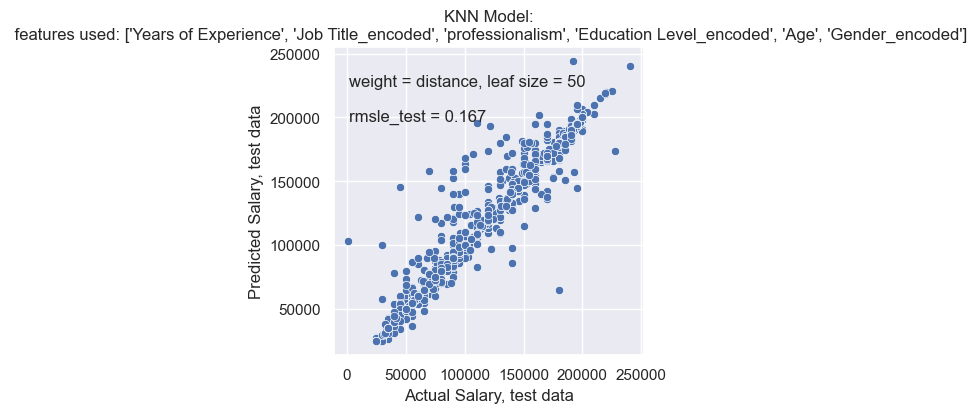

In [136]:
# # My Solution - KNN - tested on 'chosen_model_features'

# # split the datasets to train and test
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# n_neighbors = list(range(2,20))

weights = ['uniform','distance']

leafs = [10, 20, 30, 40, 50]

for weight in weights:
  for leaf in leafs:
    # instantiate class object
    # print(val)
    # print(type(val))
    knr = KNeighborsRegressor(n_neighbors = 5, weights = weight, algorithm = 'ball_tree', leaf_size = leaf)
    
    # fit
    # knr.fit(X_train,y_train)
    knr.fit(X_train[chosen_model_features],y_train)
    
    # predict
    # y_pred_knn_train = knr.predict(X_train)
    # y_pred_knn_test = knr.predict(X_test)
    y_pred_knn_train = knr.predict(X_train[chosen_model_features])
    y_pred_knn_test = knr.predict(X_test[chosen_model_features])
    
    # score
    # knr_rmse_train = np.sqrt(mean_squared_error(y2_train, y_pred_knn_train))
    # knr_rmse_test = np.sqrt(mean_squared_error(y2_test, y_pred_knn_test))
    knr_rmsle_train = rmsle(y_train, y_pred_knn_train)
    knr_rmsle_test = rmsle(y_test, y_pred_knn_test)
    

    # print coeffiecients
    print(f"When weight equals {weight}:")
    print(f"K-Nearest Neighbour Reg. train model's rmsle is {knr_rmsle_train:.4f}")
    print(f"K-Nearest Neighbour Reg. test model's rmsle is {knr_rmsle_test:.4f}")
    print(f"rmse_test - rmse_train = {knr_rmsle_test - knr_rmsle_train:.4f}\n")
    
      # plot
    fig, ax = plt.subplots()
    sns.scatterplot(x = y_test, y = y_pred_knn_test, ax = ax)
    ax.text(x=0.05, y=0.75, s= f'weight = {weight}, leaf size = {leaf}\n\nrmsle_test = {knr_rmsle_test:.3f}', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)
    
    
    sns.set(rc={'figure.figsize':(4,4)})
    plt.title(f"KNN Model:\n features used: {features}")
    plt.xlabel('Actual Salary, test data')
    plt.ylabel('Predicted Salary, test data')

C:\Users\user\anaconda3\envs\eda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.243e+11, tolerance: 1.050e+09
  model = cd_fast.enet_coordinate_descent(


for alpha = 1e-09:
lasso rmsle train is 0.315 and test rmsle is 0.328
ridge rmsle train is 0.315 and test rmsle is 0.328



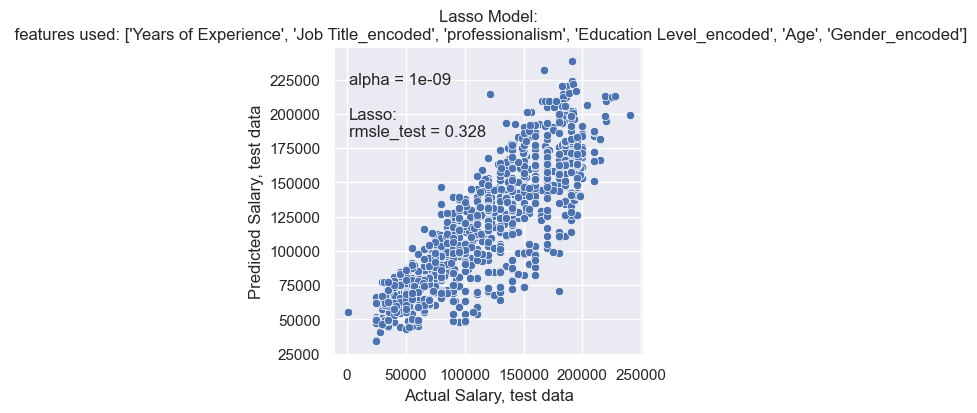

In [137]:
# Testing with Lasso/ridge Linear regression - when using only 'chosen_model_features'
# Nothing to write home about ###################################################################

# split the datasets to train and test
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# define alphas to interate through
# alphas = [0.000001, 0.01, 0.1,1, 10,100, 1000,10000]
# alphas = [0.000001, 0.01, 0.1,1, 10,100, 10000, 100000, 1000000, 10000000]
alphas = [0.000000001]

from sklearn.linear_model import LinearRegression, Lasso, Ridge

for alpha in alphas:
  # print(alpha)
  # instantiate class object
  lasso = Lasso(alpha = alpha)
  ridge = Ridge(alpha = alpha)

  # fit
  # lasso.fit(X_train, y_train)
  # ridge.fit(X_train, y_train)
  lasso.fit(X_train[chosen_model_features], y_train)
  ridge.fit(X_train[chosen_model_features], y_train)

  # predict
  # y_pred_lasso_train = lasso.predict(X_train)
  # y_pred_ridge_train = ridge.predict(X_train)
  # y_pred_lasso_test = lasso.predict(X_test)
  # y_pred_ridge_test = ridge.predict(X_test)
  y_pred_lasso_train = lasso.predict(X_train[chosen_model_features])
  y_pred_ridge_train = ridge.predict(X_train[chosen_model_features])
  y_pred_lasso_test = lasso.predict(X_test[chosen_model_features])
  y_pred_ridge_test = ridge.predict(X_test[chosen_model_features])

  # score
  lasso_rmsle_train = rmsle(y_train, y_pred_lasso_train)
  ridge_rmsle_train = rmsle(y_train, y_pred_ridge_train)
  lasso_rmsle_test = rmsle(y_test, y_pred_lasso_test)
  ridge_rmsle_test = rmsle(y_test, y_pred_ridge_test)

  # print coeffiecients
  print(f'for alpha = {alpha}:')
  print(f"lasso rmsle train is {lasso_rmsle_train:.3f} and test rmsle is {lasso_rmsle_test:.3f}")
  print(f"ridge rmsle train is {ridge_rmsle_train:.3f} and test rmsle is {ridge_rmsle_test:.3f}\n")

  # plot
  fig, ax = plt.subplots()
  sns.scatterplot(x = y_test, y = y_pred_lasso_test, ax = ax, color = 'b')
  # sns.scatterplot(x = y_test, y = y_pred_ridge_test, ax = ax, color = 'g')
  ax.text(x=0.05, y=0.7, s= f'alpha = {alpha}\n\nLasso:\nrmsle_test = {lasso_rmsle_test:.3f}', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)
  
  sns.set(rc={'figure.figsize':(4,4)})
  plt.title(f"Lasso Model:\n features used: {features}")
  plt.xlabel('Actual Salary, test data')
  plt.ylabel('Predicted Salary, test data')
  # plt.legend(loc = 'best')

  # print(f"and features {X_train[['Country_encoded','Race_encoded']].columns.values}:")
  # print(f"lasso coefficients are: {lasso.coef_}")
  # print(f"ridge coefficients are: {ridge.coef_}\n")

C:\Users\user\anaconda3\envs\eda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.243e+11, tolerance: 1.050e+09
  model = cd_fast.enet_coordinate_descent(


for alpha = 1e-09:
lasso rmsle train is 0.315 and test rmsle is 0.328
ridge rmsle train is 0.315 and test rmsle is 0.328



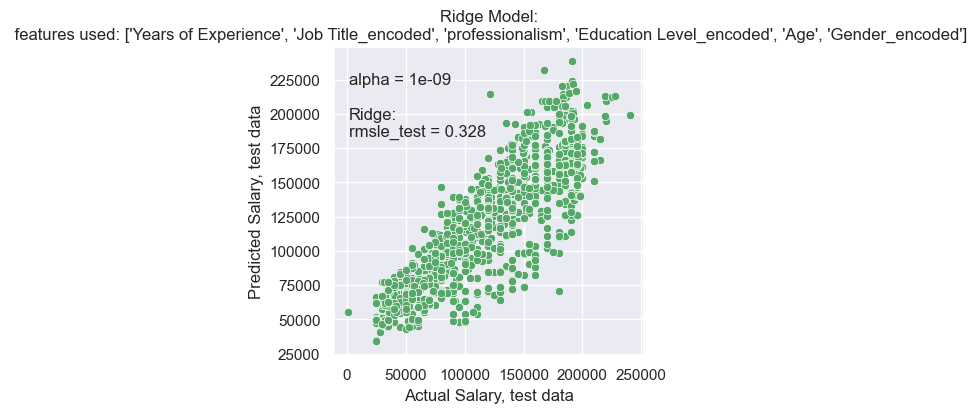

In [138]:
# Testing with Lasso/ridge Linear regression - when using only 'chosen_model_features'
# Nothing to write home about ###################################################################

# split the datasets to train and test
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# define alphas to interate through
# alphas = [0.000001, 0.01, 0.1,1, 10,100, 1000,10000]
# alphas = [0.000001, 0.01, 0.1,1, 10,100, 10000, 100000, 1000000, 10000000]
alphas = [0.000000001]

from sklearn.linear_model import LinearRegression, Lasso, Ridge

for alpha in alphas:
  # print(alpha)
  # instantiate class object
  lasso = Lasso(alpha = alpha)
  ridge = Ridge(alpha = alpha)

  # fit
  # lasso.fit(X_train, y_train)
  # ridge.fit(X_train, y_train)
  lasso.fit(X_train[chosen_model_features], y_train)
  ridge.fit(X_train[chosen_model_features], y_train)

  # predict
  # y_pred_lasso_train = lasso.predict(X_train)
  # y_pred_ridge_train = ridge.predict(X_train)
  # y_pred_lasso_test = lasso.predict(X_test)
  # y_pred_ridge_test = ridge.predict(X_test)
  y_pred_lasso_train = lasso.predict(X_train[chosen_model_features])
  y_pred_ridge_train = ridge.predict(X_train[chosen_model_features])
  y_pred_lasso_test = lasso.predict(X_test[chosen_model_features])
  y_pred_ridge_test = ridge.predict(X_test[chosen_model_features])

  # score
  lasso_rmsle_train = rmsle(y_train, y_pred_lasso_train)
  ridge_rmsle_train = rmsle(y_train, y_pred_ridge_train)
  lasso_rmsle_test = rmsle(y_test, y_pred_lasso_test)
  ridge_rmsle_test = rmsle(y_test, y_pred_ridge_test)

  # print coeffiecients
  print(f'for alpha = {alpha}:')
  print(f"lasso rmsle train is {lasso_rmsle_train:.3f} and test rmsle is {lasso_rmsle_test:.3f}")
  print(f"ridge rmsle train is {ridge_rmsle_train:.3f} and test rmsle is {ridge_rmsle_test:.3f}\n")

  # plot
  fig, ax = plt.subplots()
  # sns.scatterplot(x = y_test, y = y_pred_lasso_test, ax = ax, color = 'b')
  sns.scatterplot(x = y_test, y = y_pred_ridge_test, ax = ax, color = 'g')
  ax.text(x=0.05, y=0.7, s= f'alpha = {alpha}\n\nRidge:\nrmsle_test = {ridge_rmsle_test:.3f}', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)
  
  sns.set(rc={'figure.figsize':(4,4)})
  plt.title(f"Ridge Model:\n features used: {features}")
  plt.xlabel('Actual Salary, test data')
  plt.ylabel('Predicted Salary, test data')
  # plt.legend(loc = 'best')

  # print(f"and features {X_train[['Country_encoded','Race_encoded']].columns.values}:")
  # print(f"lasso coefficients are: {lasso.coef_}")
  # print(f"ridge coefficients are: {ridge.coef_}\n")

C:\Users\user\AppData\Local\Temp\ipykernel_20328\1627342316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(chosen_model_features).ngroup()


Text(0, 0.5, 'Predicted Salary, test data')

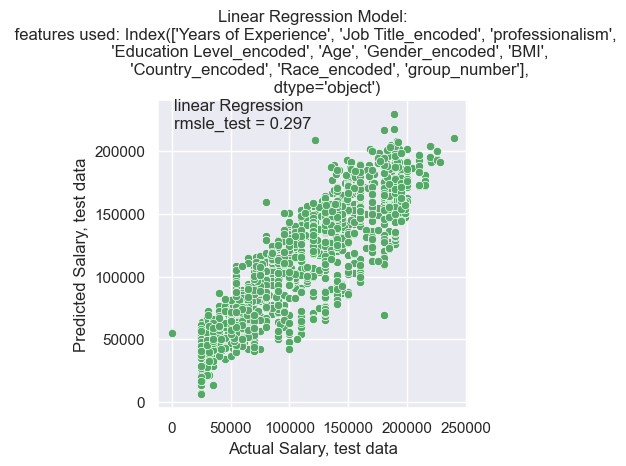

In [149]:
# testing how linear regression model behaves when given a feature interaction column
X['group_number'] = X.groupby(chosen_model_features).ngroup()

lm = LinearRegression()

model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

lm_rmsle = rmsle(y_test,y_pred)

# plot
fig, ax = plt.subplots()
# sns.scatterplot(x = y_test, y = y_pred_lasso_test, ax = ax, color = 'b')
sns.scatterplot(x = y_test, y = y_pred, ax = ax, color = 'g')
ax.text(x=0.05, y=0.9, s= f'linear Regression\nrmsle_test = {lm_rmsle:.3f}', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)
  
sns.set(rc={'figure.figsize':(4,4)})
plt.title(f"Linear Regression Model:\n features used: {X_train.columns}")
plt.xlabel('Actual Salary, test data')
plt.ylabel('Predicted Salary, test data')



C:\Users\user\AppData\Local\Temp\ipykernel_20328\2402218703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group_number'] = X.groupby(chosen_model_features).ngroup()


Text(0, 0.5, 'Predicted Salary, test data')

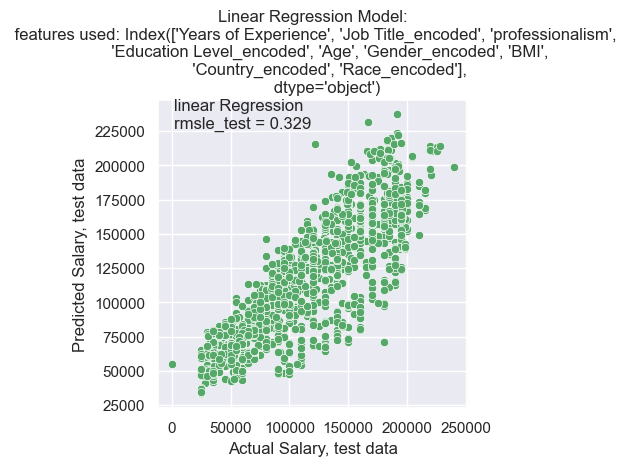

In [154]:
# testing how linear regression model behaves when given a feature interaction column
X['group_number'] = X.groupby(chosen_model_features).ngroup()

lm = LinearRegression()

model = lm.fit(X_train[X_train.columns[:-1]],y_train)

y_pred = lm.predict(X_test[X_test.columns[:-1]])

lm_rmsle = rmsle(y_test,y_pred)

# plot
fig, ax = plt.subplots()
# sns.scatterplot(x = y_test, y = y_pred_lasso_test, ax = ax, color = 'b')
sns.scatterplot(x = y_test, y = y_pred, ax = ax, color = 'g')
ax.text(x=0.05, y=0.9, s= f'linear Regression\nrmsle_test = {lm_rmsle:.3f}', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)
  
sns.set(rc={'figure.figsize':(4,4)})
plt.title(f"Linear Regression Model:\n features used: {X_train.columns[:-1]}")
plt.xlabel('Actual Salary, test data')
plt.ylabel('Predicted Salary, test data')

In [146]:
# Conclusion: including the 'group_by'-based 'group_number' column that conveys/reflects feature interaction to the model, 
# slightly improves the rmsle of the Linear Regression model: rmsle decreases from 0.329 to 0.297

array([126888.91759733,  51401.35895578, 119729.7367254 , ...,
       134746.1677026 ,  71642.6450717 , 162582.38370998])